In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict
# from wordcloud import WordCloud
import pandas as pd
import plotly.figure_factory as ff
# from src.model import apriori
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import plotly.plotly as py 

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from collections import defaultdict
import itertools

In [5]:
import sys
project_path = "/home/ashmi/Amazon-Mining"
# make sure to use position 1
sys.path.insert(1, project_path)

In [6]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [7]:
def get_cat(l):
    return l[-1]

## data loading

In [8]:
from src.data.json_loader import JSONLoader
# file_path corresponds to the file of the .gz file which contains the JSON file. 
product_path = '/home/ashmi/Desktop/Amazondata/meta_Electronics.json.gz'
loader = JSONLoader()
product = loader.load_data(product_path)

In [9]:
reviews_path = '/home/ashmi/Desktop/Amazondata/reviews_Electronics_5.json.gz'
reviews = loader.load_data(reviews_path)

In [10]:
product.head()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [11]:
product.categories = product.categories.apply(flatten)

In [12]:
product.shape

(498196, 9)

In [13]:
product.categories

0         [Electronics, Computers & Accessories, Cables ...
1         [Electronics, Computers & Accessories, Cables ...
2         [Electronics, Computers & Accessories, PDAs, H...
3         [Electronics, Accessories & Supplies, Audio & ...
4         [Electronics, GPS & Navigation, Vehicle GPS, T...
5         [Electronics, Accessories & Supplies, Audio & ...
6         [Electronics, eBook Readers & Accessories, Pow...
7         [Electronics, eBook Readers & Accessories, Skins]
8         [Electronics, eBook Readers & Accessories, Cov...
9         [Electronics, eBook Readers & Accessories, Cov...
10        [Electronics, eBook Readers & Accessories, Cov...
11        [Electronics, eBook Readers & Accessories, Cov...
12        [Electronics, Computers & Accessories, Touch S...
13        [Electronics, eBook Readers & Accessories, Cov...
14        [Electronics, Accessories & Supplies, Audio & ...
15        [Electronics, Computers & Accessories, Touch S...
16        [Electronics, eBook Readers & 

In [14]:
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [15]:
len(reviews.reviewerID.unique())

192403

In [16]:
reviews.shape

(1689188, 9)

# common products between 2 datasets

In [17]:
common_products = product.loc[product.asin.isin(reviews.asin), ]

In [18]:
common_products.shape

(63001, 9)

In [19]:
common_products.to_csv('common_products.csv', index=False)

In [20]:
reviews_indexed_by_reviewerID = reviews.set_index(['reviewerID'])

In [21]:
unique_reviewer = np.unique(reviews.reviewerID)

In [22]:
len(unique_reviewer)

192403

In [23]:
reviews_by_reviewer = reviews.groupby(by=['reviewerID'])['asin'].count()

In [24]:
review_to_asin = reviews.groupby(by=['reviewerID'])['asin'].unique()

In [25]:
review_to_asin

reviewerID
A000715434M800HLCENK9    [B000UYYZ0M, B001EHAI6Y, B003AFONFU, B003ES5ZU...
A00101847G3FJTWYGNQA     [B005F778JO, B006T9B6R2, B009NB8WR0, B00B19L8L...
A00166281YWM98A3SVD55    [B005HGBF9W, B005HSG3BA, B0074BW614, B007B5S8B...
A0046696382DWIPVIWO0K    [B0025ZUF8K, B002TTKC2G, B00CH643A8, B00E055H5...
A00472881KT6WR48K907X    [B0000AZJZT, B003LTRLPY, B0053OLY9O, B007UIX1M...
A00473363TJ8YSZ3YAGG9    [B002LB42NM, B0039BYJ4A, B003MX4D0U, B003NR57B...
A005721627VX5W2COKKK2    [B001T9N0SU, B002WAZ0B0, B0031MGUBC, B003ELYQG...
A00700212KB3K0MVESPIY    [B000IXNEI4, B000VWPULQ, B003WUBIZQ, B0041Q38N...
A007780739H92ZWKGVWGJ    [B000S5Q9CA, B000VOE466, B004LVMCMS, B007BYWJU...
A00814373OZEDXYMXP04T    [B000P910OG, B0015V1H28, B002A6CWCQ, B002HK0UQ...
A01036691ZFOFCXBLP2D1    [B00066IJPQ, B000BUIP6K, B001A4HAFS, B005HPSFW...
A0103849GBVWICKXD4T6     [B000067RRX, B003MG9F78, B003ZSP0WW, B009A6CZY...
A0104775CQOXJTV4OH68     [B001TIG36C, B002V88HFE, B004Y09I9Q, B008DC9E8...
A0110255Y4ER0R

# merging 2 datasets

In [26]:
merged_reviews = reviews.merge(product, on='asin')

In [27]:
merged_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[Electronics, GPS & Navigation, Vehicle GPS, T...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[Electronics, GPS & Navigation, Vehicle GPS, T...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[Electronics, GPS & Navigation, Vehicle GPS, T...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[Electronics, GPS & Navigation, Vehicle GPS, T...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[Electronics, GPS & Navigation, Vehicle GPS, T...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [28]:
# merged_reviews.to_csv('merged_reviews.csv', sep='\t', encoding='utf-8')

In [29]:
merged_reviews.categories = merged_reviews.categories.apply(get_cat)

In [30]:
merged_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...",Trucking GPS,Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...",Trucking GPS,Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...",Trucking GPS,Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...",Trucking GPS,Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...",Trucking GPS,Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [184]:
merged_reviews.shape

(1689188, 17)

## Most popular category based on overall rating

In [31]:
merged_categories_overall_data = merged_reviews[['reviewerID','asin','overall','categories']].copy()

In [32]:
merged_categories_overall_data

,reviewerID,asin,overall,categories
0,AO94DHGC771SJ,0528881469,5.0,Trucking GPS
1,AMO214LNFCEI4,0528881469,1.0,Trucking GPS
2,A3N7T0DY83Y4IG,0528881469,3.0,Trucking GPS
3,A1H8PY3QHMQQA0,0528881469,2.0,Trucking GPS
4,A24EV6RXELQZ63,0528881469,1.0,Trucking GPS
5,A2JXAZZI9PHK9Z,0594451647,5.0,Chargers & Adapters
6,A2P5U7BDKKT7FW,0594451647,2.0,Chargers & Adapters
7,AAZ084UMH8VZ2,0594451647,5.0,Chargers & Adapters
8,AEZ3CR6BKIROJ,0594451647,4.0,Chargers & Adapters
9,A3BY5KCNQZXV5U,0594451647,5.0,Chargers & Adapters


In [33]:
type(merged_categories_overall_data.overall[1])

numpy.float64

### Most popular category based on positive overall rating

In [34]:

merged_categories_positive_data = merged_categories_overall_data.loc[merged_categories_overall_data['overall']> 3.0]


In [35]:
merged_categories_positive_data.head()

,reviewerID,asin,overall,categories
0,AO94DHGC771SJ,0528881469,5.0,Trucking GPS
5,A2JXAZZI9PHK9Z,0594451647,5.0,Chargers & Adapters
7,AAZ084UMH8VZ2,0594451647,5.0,Chargers & Adapters
8,AEZ3CR6BKIROJ,0594451647,4.0,Chargers & Adapters
9,A3BY5KCNQZXV5U,0594451647,5.0,Chargers & Adapters


In [36]:
positive_overall_categories = merged_categories_positive_data[['overall','categories']].groupby(['categories'], as_index=False)


In [37]:
positive_overall_categories.head()

,overall,categories
0,5.0,Trucking GPS
5,5.0,Chargers & Adapters
7,5.0,Chargers & Adapters
8,4.0,Chargers & Adapters
9,5.0,Chargers & Adapters
10,4.0,Power Adapters
11,5.0,Power Adapters
12,5.0,Power Adapters
14,5.0,Power Adapters
17,4.0,Power Adapters


In [38]:
categories_positive_popularity_df = pd.DataFrame(positive_overall_categories.size().reset_index(name = "positive_rating_count"))

In [39]:
categories_positive_popularity_df

,categories,positive_rating_count
0,3D Glasses,2040
1,AC Adapters,4097
2,APS Cameras,7
3,AV Receivers & Amplifiers,557
4,Access-Control Keypads,61
5,Accessories,1838
6,Accessories & Supplies,4663
7,Accessory Bundles,253
8,Accessory Kits,3421
9,Adapter Rings,535


In [40]:
sorted_categories_positive =categories_positive_popularity_df.sort_values(by='positive_rating_count')
sorted_categories_positive = sorted_categories_positive[-10:]

In [41]:
sorted_categories_positive_name = list(sorted_categories_positive.categories)
sorted_categories_positive_count = list (sorted_categories_positive.positive_rating_count)

In [42]:
import plotly.graph_objs as go
fig = {
  "data": [
    {
      "values": sorted_categories_positive_count,
      "labels": sorted_categories_positive_name,
      "domain": {"x": [0, .48]},
      "name": "Category",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"

    }],
  "layout": {
        "title":"Number of Positive Ratings received for each lowest level category (shows the top 10 categories)",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Categories",
                "x": 0.16,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Categories",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='positive_rating_categories')


### Most popular category based on negative overall ratings (overall = 1,2)

In [43]:
merged_categories_negative_data = merged_categories_overall_data.loc[merged_categories_overall_data['overall']< 3.0]


In [44]:
negative_overall_categories = merged_categories_negative_data[['overall','categories']].groupby(['categories'], as_index=False)


In [45]:
categories_negative_popularity_df = pd.DataFrame(negative_overall_categories.size().reset_index(name = "negative_rating_count"))

In [46]:
sorted_categories_negative =categories_negative_popularity_df.sort_values(by='negative_rating_count')
sorted_categories_negative = sorted_categories_negative[-10:] 

In [47]:
sorted_categories_negative

,categories,negative_rating_count
707,USB Network Adapters,3132
525,Point & Shoot Digital Cameras,3169
432,MP3 Players,3315
649,Streaming Media Players,3456
143,Chargers & Adapters,3469
452,Mice,3633
259,External Hard Drives,3974
576,Routers,4873
132,Cases,9229
324,Headphones,10081


In [48]:
sorted_categories_negative_name = list (sorted_categories_negative.categories)
sorted_categories_negative_count = list (sorted_categories_negative.negative_rating_count)

In [49]:
import plotly.graph_objs as go
fig = {
  "data": [
    {
      "values": sorted_categories_negative_count,
      "labels": sorted_categories_negative_name,
      "domain": {"x": [0, .48]},
      "name": "Category",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"

    }],
  "layout": {
        "title":"Number of Negative Ratings received for each lowest level category (shows the top 10 categories)",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Categories",
                "x": 0.16,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Categories",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='negative_rating_categories')


## Most popular category based on number of reviews

In [50]:
categories_data = merged_reviews[['reviewerID','asin','categories']].copy()

In [51]:
categories_data

,reviewerID,asin,categories
0,AO94DHGC771SJ,0528881469,Trucking GPS
1,AMO214LNFCEI4,0528881469,Trucking GPS
2,A3N7T0DY83Y4IG,0528881469,Trucking GPS
3,A1H8PY3QHMQQA0,0528881469,Trucking GPS
4,A24EV6RXELQZ63,0528881469,Trucking GPS
5,A2JXAZZI9PHK9Z,0594451647,Chargers & Adapters
6,A2P5U7BDKKT7FW,0594451647,Chargers & Adapters
7,AAZ084UMH8VZ2,0594451647,Chargers & Adapters
8,AEZ3CR6BKIROJ,0594451647,Chargers & Adapters
9,A3BY5KCNQZXV5U,0594451647,Chargers & Adapters


In [52]:
categories_data.loc[:,'categories'].unique().shape[0]

801

In [53]:
categories_review_popularity = categories_data[['categories','reviewerID','asin']].groupby(['categories'], as_index=False)


In [54]:
categories_review_popularity.head()

,categories,reviewerID,asin
0,Trucking GPS,AO94DHGC771SJ,0528881469
1,Trucking GPS,AMO214LNFCEI4,0528881469
2,Trucking GPS,A3N7T0DY83Y4IG,0528881469
3,Trucking GPS,A1H8PY3QHMQQA0,0528881469
4,Trucking GPS,A24EV6RXELQZ63,0528881469
5,Chargers & Adapters,A2JXAZZI9PHK9Z,0594451647
6,Chargers & Adapters,A2P5U7BDKKT7FW,0594451647
7,Chargers & Adapters,AAZ084UMH8VZ2,0594451647
8,Chargers & Adapters,AEZ3CR6BKIROJ,0594451647
9,Chargers & Adapters,A3BY5KCNQZXV5U,0594451647


In [55]:
categories_review_popularity_df = pd.DataFrame(categories_review_popularity.size().reset_index(name = "categories_review_popularity"))

In [56]:
categories_review_popularity_df

,categories,categories_review_popularity
0,3D Glasses,2620
1,AC Adapters,5018
2,APS Cameras,7
3,AV Receivers & Amplifiers,686
4,Access-Control Keypads,75
5,Accessories,2223
6,Accessories & Supplies,5813
7,Accessory Bundles,287
8,Accessory Kits,4159
9,Adapter Rings,609


In [57]:
sorted_categories_review =categories_review_popularity_df.sort_values(by='categories_review_popularity')


In [58]:
sorted_categories_review = sorted_categories_review[-10:]  # extracting the top 10 categories by popularity (number of reviews)

In [59]:
sorted_categories_review

,categories,categories_review_popularity
746,USB Flash Drives,23544
744,USB Cables,24338
674,Speaker Systems,24982
483,Mice,27105
281,External Hard Drives,28357
157,Chargers & Adapters,28435
558,Point & Shoot Digital Cameras,29373
339,HDMI Cables,40836
351,Headphones,69779
142,Cases,92936


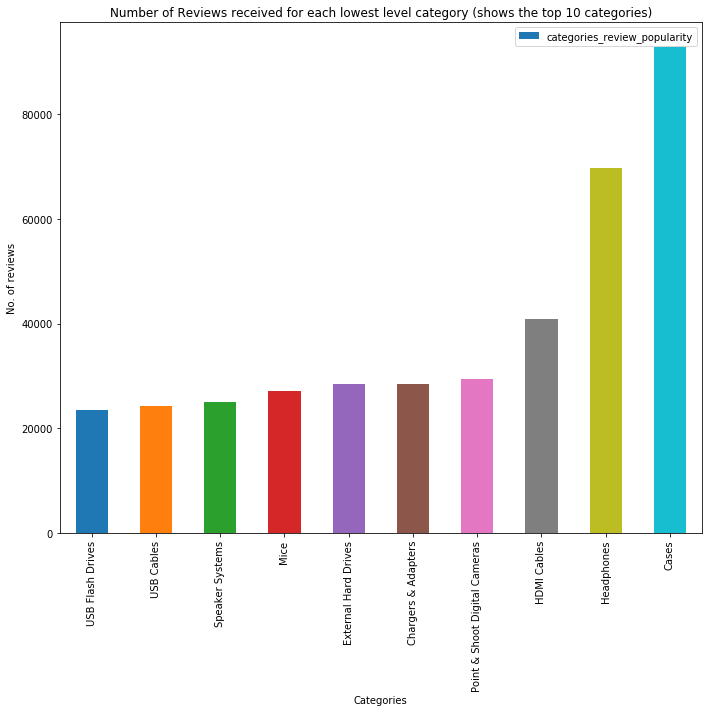

In [60]:
fig = sorted_categories_review.plot(x = 'categories', y = 'categories_review_popularity', kind="bar", figsize = (10,10))


plt.title("Number of Reviews received for each lowest level category (shows the top 10 categories)")
plt.xlabel("Categories")
plt.ylabel("No. of reviews")

plt.tight_layout()
plt.savefig("plot Number of Reviews received for each category bar.png")
plt.show()

In [61]:
sorted_categories_name = sorted_categories_review.categories

In [62]:
sorted_categories_name_list = list(sorted_categories_name)

In [63]:
sorted_categories_name_list

['USB Flash Drives',
 'USB Cables',
 'Speaker Systems',
 'Mice',
 'External Hard Drives',
 'Chargers & Adapters',
 'Point & Shoot Digital Cameras',
 'HDMI Cables',
 'Headphones',
 'Cases']

In [64]:
sorted_categories_count_list = list(sorted_categories_review.categories_review_popularity)

In [65]:
sorted_categories_count_list

[23544, 24338, 24982, 27105, 28357, 28435, 29373, 40836, 69779, 92936]

In [66]:
# fig = sorted_categories_review.plot(labels = sorted_categories_name_list, y ='categories_review_popularity', kind="pie", figsize = (10,8)) 

# plt.title("Number of Reviews received for each lowest level category (shows the top 10 categories)")

# plt.tight_layout()
# plt.savefig("plot Number of Reviews received for each category pie chart.png")
# plt.show()

In [67]:
import plotly.graph_objs as go
fig = {
  "data": [
    {
      "values": sorted_categories_count_list,
      "labels": sorted_categories_name_list,
      "domain": {"x": [0, .48]},
      "name": "Category",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"

    }],
  "layout": {
        "title":"Number of Reviews received for each lowest level category (shows the top 10 categories)",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Categories",
                "x": 0.16,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Categories",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='categories')


#### Hence, we can see that the Cases were the most reviewed category (lowest level)

## Brand- Overall rating Analysis

In [68]:
merged_brand_overall_data = merged_reviews[['reviewerID','asin','overall','brand']].copy()

In [69]:
merged_brand_overall_data

,reviewerID,asin,overall,brand
0,AO94DHGC771SJ,0528881469,5.0,NaN
1,AMO214LNFCEI4,0528881469,1.0,NaN
2,A3N7T0DY83Y4IG,0528881469,3.0,NaN
3,A1H8PY3QHMQQA0,0528881469,2.0,NaN
4,A24EV6RXELQZ63,0528881469,1.0,NaN
5,A2JXAZZI9PHK9Z,0594451647,5.0,NaN
6,A2P5U7BDKKT7FW,0594451647,2.0,NaN
7,AAZ084UMH8VZ2,0594451647,5.0,NaN
8,AEZ3CR6BKIROJ,0594451647,4.0,NaN
9,A3BY5KCNQZXV5U,0594451647,5.0,NaN


In [70]:
merged_brand_overall_data.dropna(axis=0, subset=['brand'], inplace=True) # dropping NaNs from brand


### Brand-Positive rating analysis

In [71]:

merged_brand_positive_data = merged_brand_overall_data.loc[merged_brand_overall_data['overall']> 3.0]


In [72]:
positive_overall_brand = merged_brand_positive_data[['overall','brand']].groupby(['brand'], as_index=False)


In [73]:
positive_overall_brand.head()

,overall,brand
10,4.0,Barnes &amp; Noble
11,5.0,Barnes &amp; Noble
12,5.0,Barnes &amp; Noble
14,5.0,Barnes &amp; Noble
17,4.0,Barnes &amp; Noble
18,5.0,VideoSecu
19,5.0,VideoSecu
20,5.0,VideoSecu
21,4.0,VideoSecu
22,4.0,VideoSecu


In [74]:
brand_positive_popularity_df = pd.DataFrame(positive_overall_brand.size().reset_index(name = "positive_rating_count"))

In [75]:
sorted_brand_positive =brand_positive_popularity_df.sort_values(by='positive_rating_count')
sorted_brand_positive = sorted_brand_positive[-10:]

In [76]:
sorted_brand_positive

,brand,positive_rating_count
254,Asus,11101
2570,Samsung,11975
2074,Nikon,12284
3209,Western Digital,12380
1230,Generic,12879
306,BELKIN,13506
2716,Sony,18497
572,Canon,20751
2572,SanDisk,22641
1771,Logitech,28733


In [77]:
sorted_brand_positive_name = list(sorted_brand_positive.brand)

In [78]:
sorted_brand_positive_count = list (sorted_brand_positive.positive_rating_count)

In [79]:
import plotly.graph_objs as go
fig = {
  "data": [
    {
      "values": sorted_brand_positive_count,
      "labels": sorted_brand_positive_name,
      "domain": {"x": [0, .48]},
      "name": "Brand",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"

    }],
  "layout": {
        "title":"Number of Positive Ratings received for each Brand (shows the top 10 Brands)",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Brands",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Brands",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='positive_rating_brands')


### Brand-negative rating analysis

In [80]:
merged_brand_negative_data = merged_brand_overall_data.loc[merged_brand_overall_data['overall']< 3.0]


In [81]:
negative_overall_brand = merged_brand_negative_data[['overall','brand']].groupby(['brand'], as_index=False)


In [82]:
negative_overall_brand.head()

,overall,brand
68,2.0,VideoSecu
71,1.0,VideoSecu
82,1.0,VideoSecu
167,1.0,VideoSecu
201,2.0,VideoSecu
310,2.0,Barnes &amp; Noble
320,1.0,Barnes &amp; Noble
324,1.0,Barnes &amp; Noble
329,1.0,Barnes &amp; Noble
333,1.0,Barnes &amp; Noble


In [83]:
brand_negative_popularity_df = pd.DataFrame(negative_overall_brand.size().reset_index(name = "negative_rating_count"))

In [84]:
sorted_brand_negative =brand_negative_popularity_df.sort_values(by='negative_rating_count')
sorted_brand_negative = sorted_brand_negative[-10:]

In [85]:
sorted_brand_negative

,brand,negative_rating_count
1005,Garmin,1303
2769,eForCity,1393
2625,Western Digital,1455
210,Asus,1612
1681,Netgear,1659
2107,SanDisk,1791
257,BELKIN,1831
2226,Sony,2183
1019,Generic,3007
1451,Logitech,3517


In [86]:
sorted_brand_negative_name = list (sorted_brand_negative.brand )

In [87]:
sorted_brand_negative_count = list (sorted_brand_negative.negative_rating_count )

In [88]:
import plotly.graph_objs as go
fig = {
  "data": [
    {
      "values": sorted_brand_negative_count,
      "labels": sorted_brand_negative_name,
      "domain": {"x": [0, .48]},
      "name": "Brand",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"

    }],
  "layout": {
        "title":"Number of Negative Ratings received for each Brand (shows the top 10 Brands)",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Brands",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Brands",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='negative_rating_brands')

## Brand-category Analysis

In [89]:
brand_data = merged_reviews[['reviewerID','asin','categories','price','brand']].copy()
 

In [90]:
brand_data

,reviewerID,asin,categories,price,brand
0,AO94DHGC771SJ,0528881469,Trucking GPS,299.99,NaN
1,AMO214LNFCEI4,0528881469,Trucking GPS,299.99,NaN
2,A3N7T0DY83Y4IG,0528881469,Trucking GPS,299.99,NaN
3,A1H8PY3QHMQQA0,0528881469,Trucking GPS,299.99,NaN
4,A24EV6RXELQZ63,0528881469,Trucking GPS,299.99,NaN
5,A2JXAZZI9PHK9Z,0594451647,Chargers & Adapters,49.95,NaN
6,A2P5U7BDKKT7FW,0594451647,Chargers & Adapters,49.95,NaN
7,AAZ084UMH8VZ2,0594451647,Chargers & Adapters,49.95,NaN
8,AEZ3CR6BKIROJ,0594451647,Chargers & Adapters,49.95,NaN
9,A3BY5KCNQZXV5U,0594451647,Chargers & Adapters,49.95,NaN


In [91]:
len(brand_data)

1689188

In [92]:
brand_data.loc[:,'brand'].unique().shape[0]

3526

In [93]:
brand_review_popularity = brand_data[['brand','reviewerID','asin','categories']].groupby(['brand'], as_index=False)


In [94]:
brand_review_popularity.head()

,brand,reviewerID,asin,categories
0,NaN,AO94DHGC771SJ,0528881469,Trucking GPS
1,NaN,AMO214LNFCEI4,0528881469,Trucking GPS
2,NaN,A3N7T0DY83Y4IG,0528881469,Trucking GPS
3,NaN,A1H8PY3QHMQQA0,0528881469,Trucking GPS
4,NaN,A24EV6RXELQZ63,0528881469,Trucking GPS
10,Barnes &amp; Noble,A7S2B0I67WNWB,0594481813,Power Adapters
11,Barnes &amp; Noble,A3HICVLF4PFFMN,0594481813,Power Adapters
12,Barnes &amp; Noble,ANSKSPEEAKY7S,0594481813,Power Adapters
13,Barnes &amp; Noble,A2QBZA4S1ROX9Q,0594481813,Power Adapters
14,Barnes &amp; Noble,ANY6JUFM0GH8U,0594481813,Power Adapters


In [95]:
brand_review_popularity_df = pd.DataFrame(brand_review_popularity.size().reset_index(name = "brand_review_popularity"))

In [96]:
brand_review_popularity_df

,brand,brand_review_popularity
0,,2112
1,(CHARGER4U),6
2,0722301698334,5
3,12vAdapters.com,5
4,1800Battery,27
5,180s,9
6,1d4,6
7,1stbuyer,8
8,2791 2795,7
9,2K,81


In [97]:
sorted_brand_review =brand_review_popularity_df.sort_values(by='brand_review_popularity')


In [98]:
sorted_brand_review = sorted_brand_review[-10:]  # extracting the top 10 brands by popularity (number of reviews)

In [99]:
sorted_brand_review

,brand,brand_review_popularity
255,Asus,13758
2075,Nikon,14000
2572,Samsung,14150
3211,Western Digital,14632
307,BELKIN,16945
1231,Generic,17720
2718,Sony,22675
573,Canon,23487
2574,SanDisk,25545
1772,Logitech,35324


In [100]:
type(sorted_brand_review)

pandas.core.frame.DataFrame

In [101]:
sorted_brand_review.brand

255                Asus
2075              Nikon
2572            Samsung
3211    Western Digital
307              BELKIN
1231            Generic
2718               Sony
573               Canon
2574            SanDisk
1772           Logitech
Name: brand, dtype: object

In [102]:
type(sorted_brand_review.brand)

pandas.core.series.Series

In [103]:
top_brands_list = list(sorted_brand_review.brand)
top_brands_count_list = list(sorted_brand_review.brand_review_popularity)


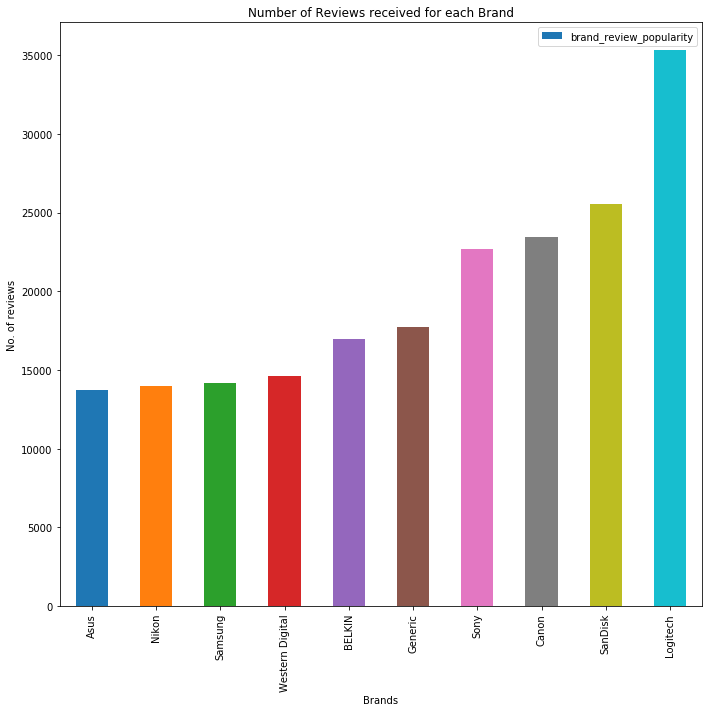

In [181]:
fig = sorted_brand_review.plot(x = 'brand', y = 'brand_review_popularity', kind="bar", figsize=(10,10))


plt.title("Number of Reviews received for each Brand")
plt.xlabel("Brands")
plt.ylabel("No. of reviews")
# fig = plt.plot()
# plt.figure()
plt.tight_layout()
plt.savefig("plot_new.jpg")
plt.show()

In [105]:
import plotly.graph_objs as go
fig = {
  "data": [
    {
      "values": top_brands_count_list,
      "labels": top_brands_list,
      "domain": {"x": [0, .48]},
      "name": "Brands",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"

    }],
  "layout": {
        "title":"Number of Reviews received for each Brand (shows the top 10 Brands)",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Brand",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Brands",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='brand_reviews')


In [106]:
type(brand_review_popularity_df)

pandas.core.frame.DataFrame

In [107]:
brand_review_popularity

In [108]:
top_brand_data = (brand_data.loc[brand_data['brand'].isin(list(sorted_brand_review.brand))]) # only extracting data relevant to the top 10 brands by popularity
# top_brand_data = brand_data.filter(lambda x: set(x['brand']) in (top_brands_list))

In [109]:
top_brand_data


,reviewerID,asin,categories,price,brand
640,A2GKUSRRPCOV17,3744295508,HDMI Cables,2.30,Generic
641,A3F2M27L02YDLM,3744295508,HDMI Cables,2.30,Generic
642,A2D23Q75DN4LLH,3744295508,HDMI Cables,2.30,Generic
643,A2N3OJ1T4IKZBM,3744295508,HDMI Cables,2.30,Generic
644,A3ORP2IZ7D19VP,3744295508,HDMI Cables,2.30,Generic
645,A18RZLFVFN6697,3744295508,HDMI Cables,2.30,Generic
646,A2LDA4B81XDVJM,3744295508,HDMI Cables,2.30,Generic
647,A32D4R7O5KQWBC,3744295508,HDMI Cables,2.30,Generic
648,A24DDONNQLE0K,3744295508,HDMI Cables,2.30,Generic
649,A2QCJ9VR3SEIR0,3744295508,HDMI Cables,2.30,Generic


In [110]:
# top_brand_categories = top_brand_data.groupby(['brand','categories'], as_index='categories_count').size()
top_brand_categories = top_brand_data.groupby(['brand','categories']).size().reset_index(name="categories_count")

In [111]:
top_brand_categories

,brand,categories,categories_count
0,Asus,AC Adapters,25
1,Asus,Amps,24
2,Asus,Batteries,5
3,Asus,Blu-ray Drives,178
4,Asus,Bundles,33
5,Asus,Cables & Interconnects,20
6,Asus,Cases,239
7,Asus,Chargers & Adapters,149
8,Asus,Computer Cable Adapters,5
9,Asus,Computer Components,70


In [112]:
len(top_brand_categories)

655

In [113]:
type(top_brand_categories)

pandas.core.frame.DataFrame

In [114]:
top_brand_categories

,brand,categories,categories_count
0,Asus,AC Adapters,25
1,Asus,Amps,24
2,Asus,Batteries,5
3,Asus,Blu-ray Drives,178
4,Asus,Bundles,33
5,Asus,Cables & Interconnects,20
6,Asus,Cases,239
7,Asus,Chargers & Adapters,149
8,Asus,Computer Cable Adapters,5
9,Asus,Computer Components,70


In [115]:
top_brand_categories.brand.unique()

array(['Asus', 'BELKIN', 'Canon', 'Generic', 'Logitech', 'Nikon',
       'Samsung', 'SanDisk', 'Sony', 'Western Digital'], dtype=object)

In [116]:
top_brand_categories_gb_brand = top_brand_categories.groupby(['brand'])

In [117]:
top_brand_categories_gb_brand.head()

,brand,categories,categories_count
0,Asus,AC Adapters,25
1,Asus,Amps,24
2,Asus,Batteries,5
3,Asus,Blu-ray Drives,178
4,Asus,Bundles,33
45,BELKIN,Accessories & Supplies,34
46,BELKIN,Adapters,558
47,BELKIN,Antennas,457
48,BELKIN,Armbands,237
49,BELKIN,Audio Cables,151


AttributeError: 'Series' object has no attribute 'set_title'

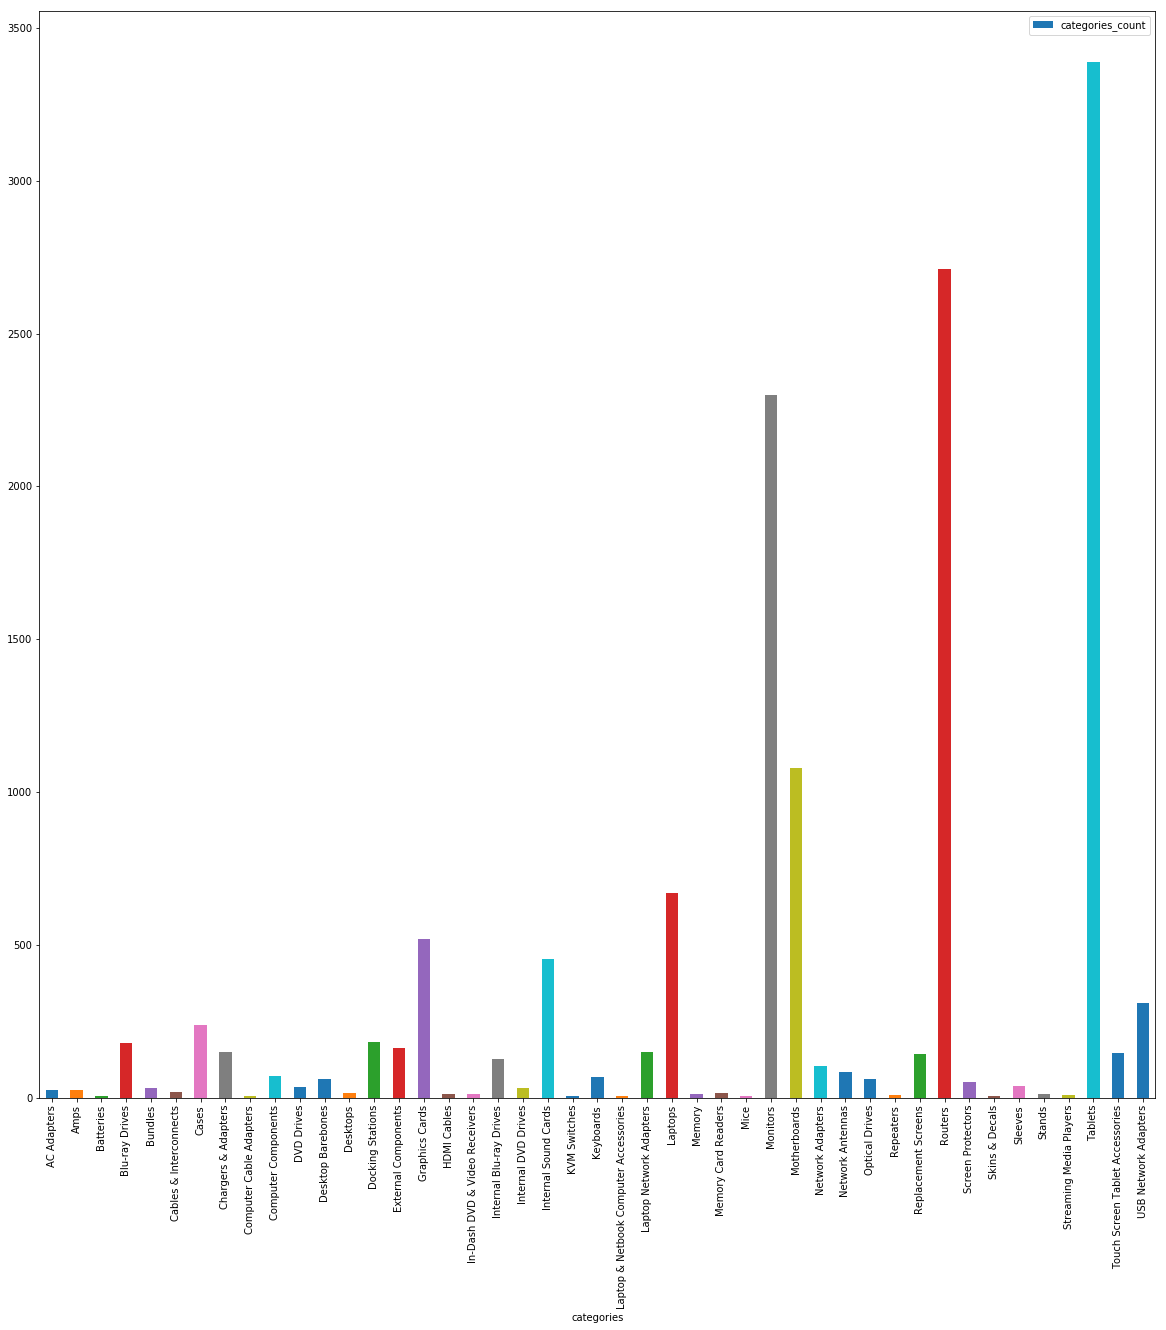

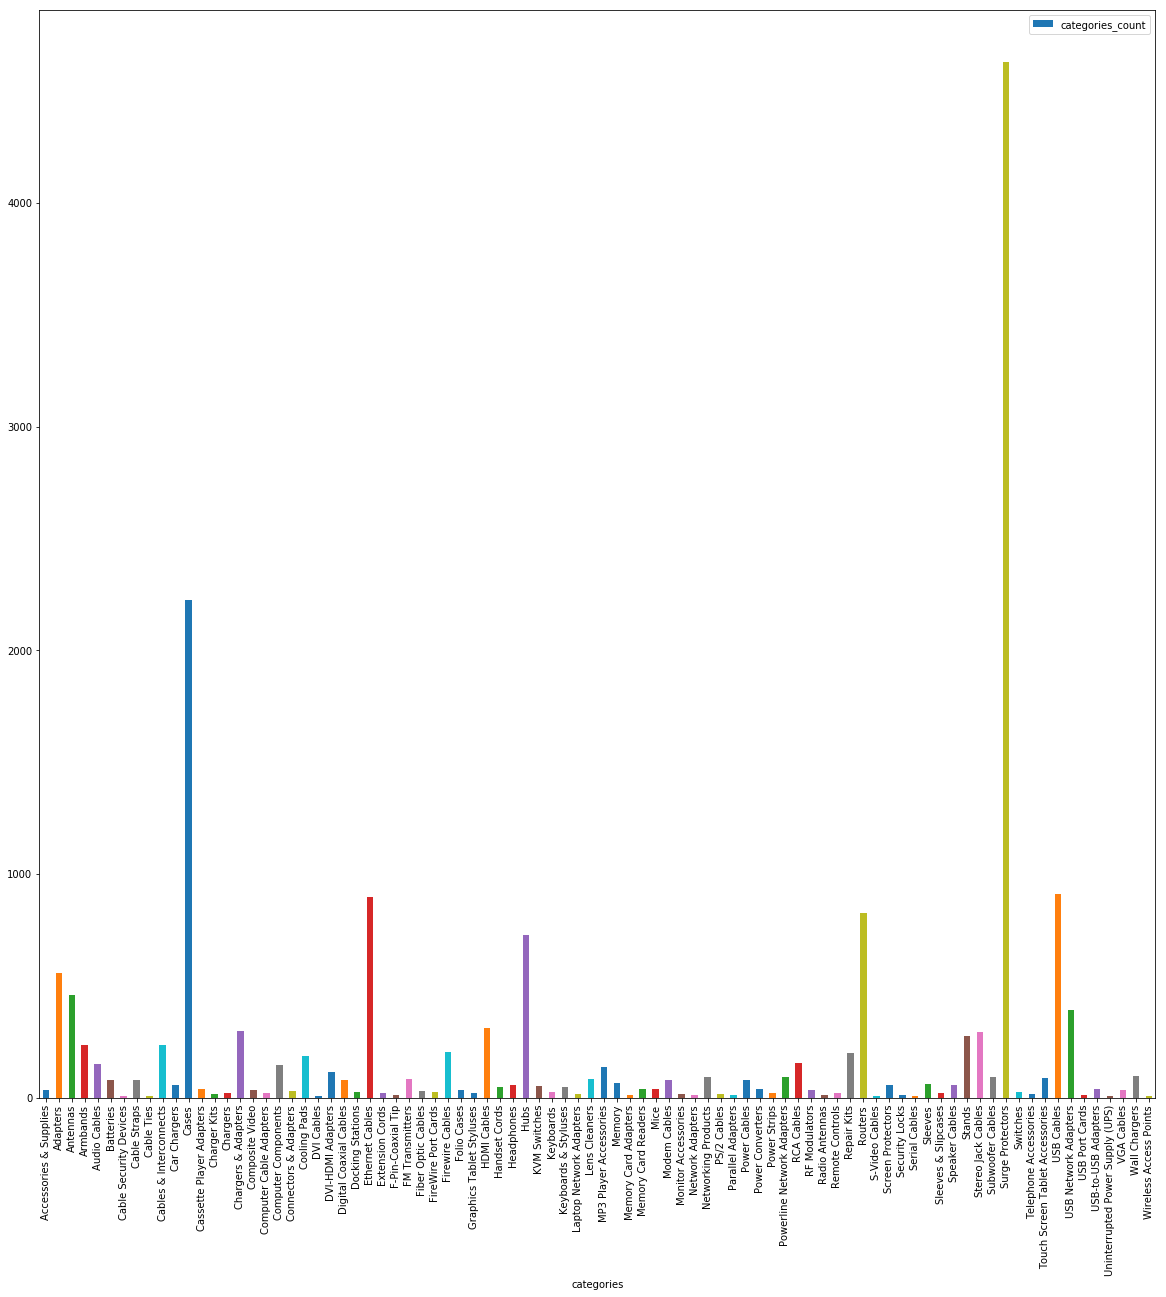

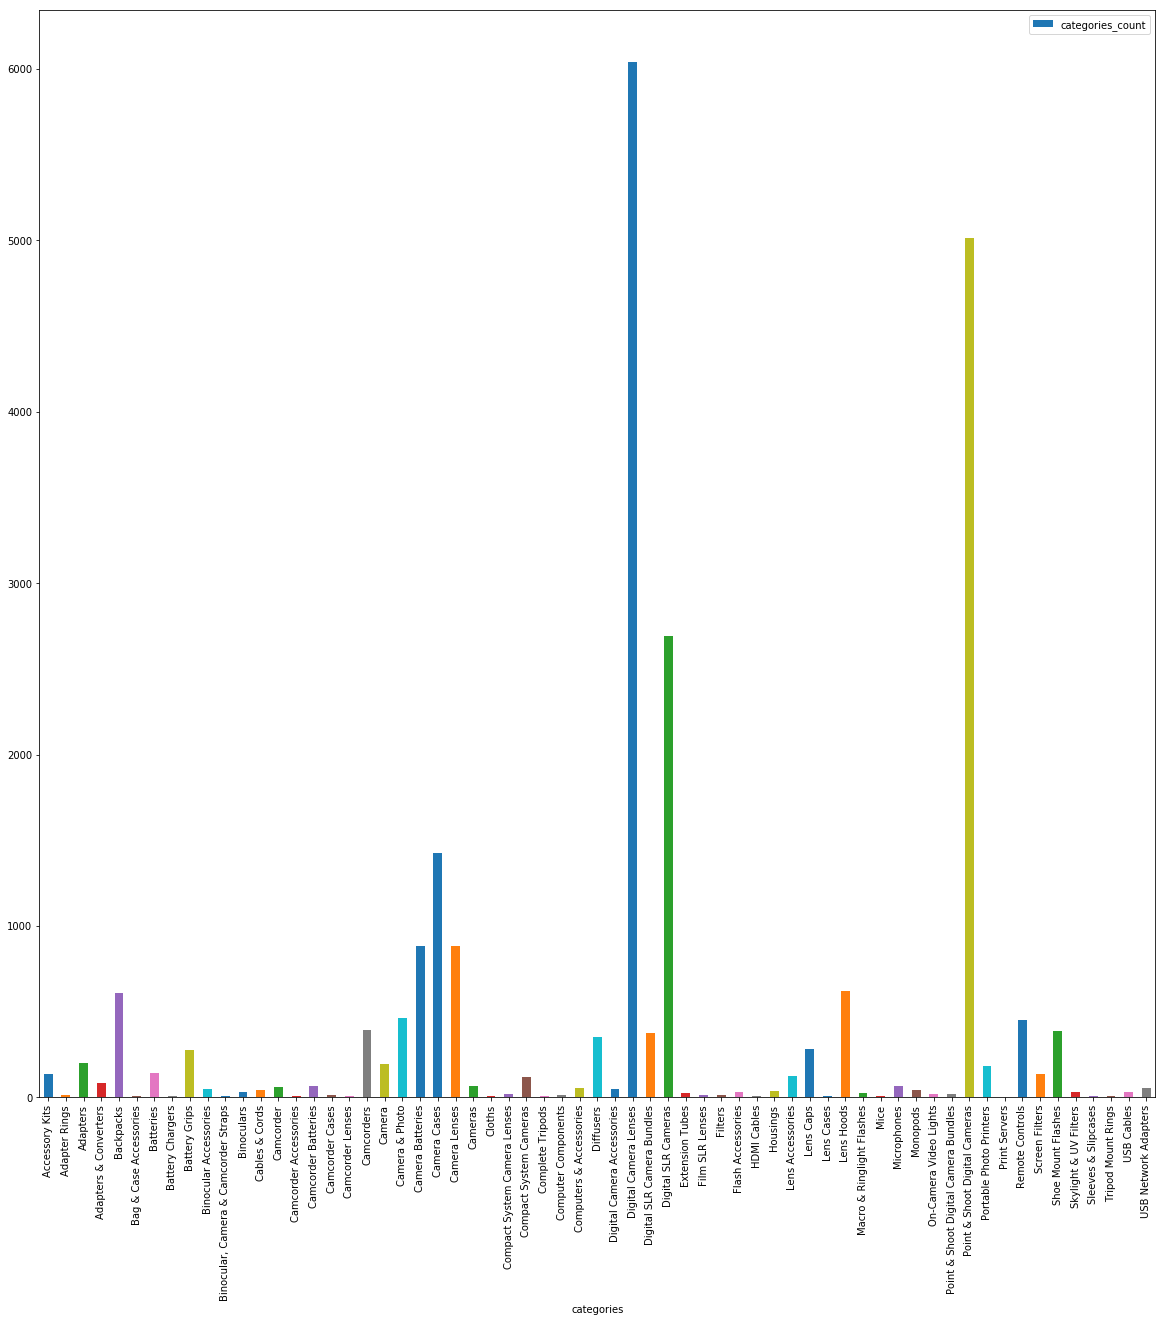

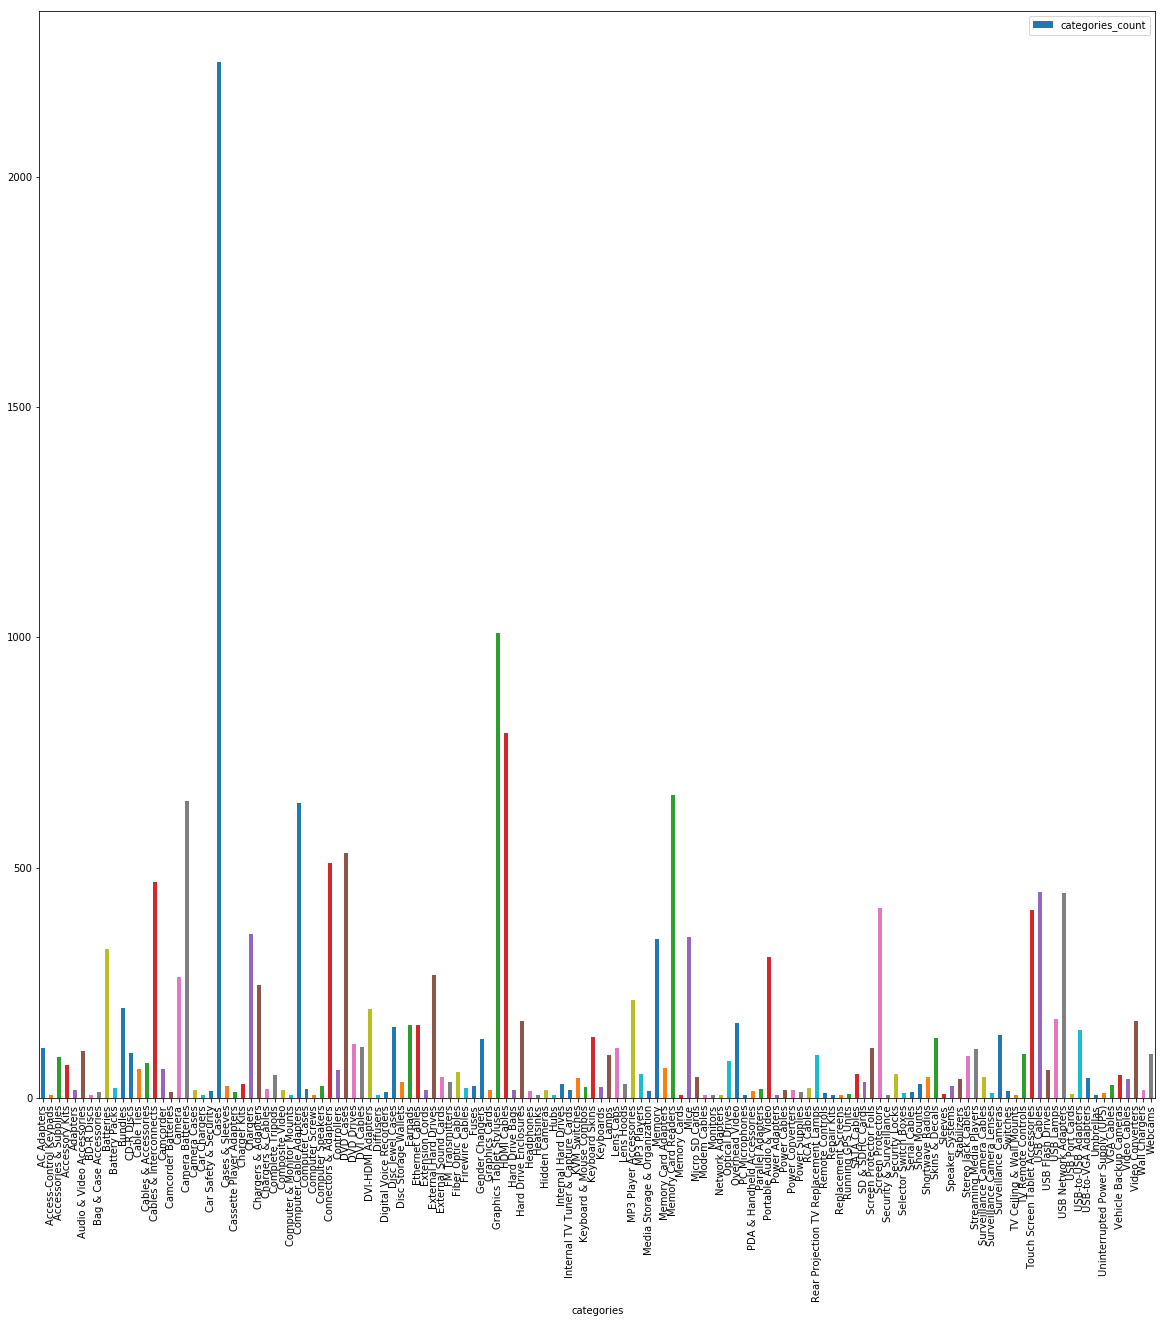

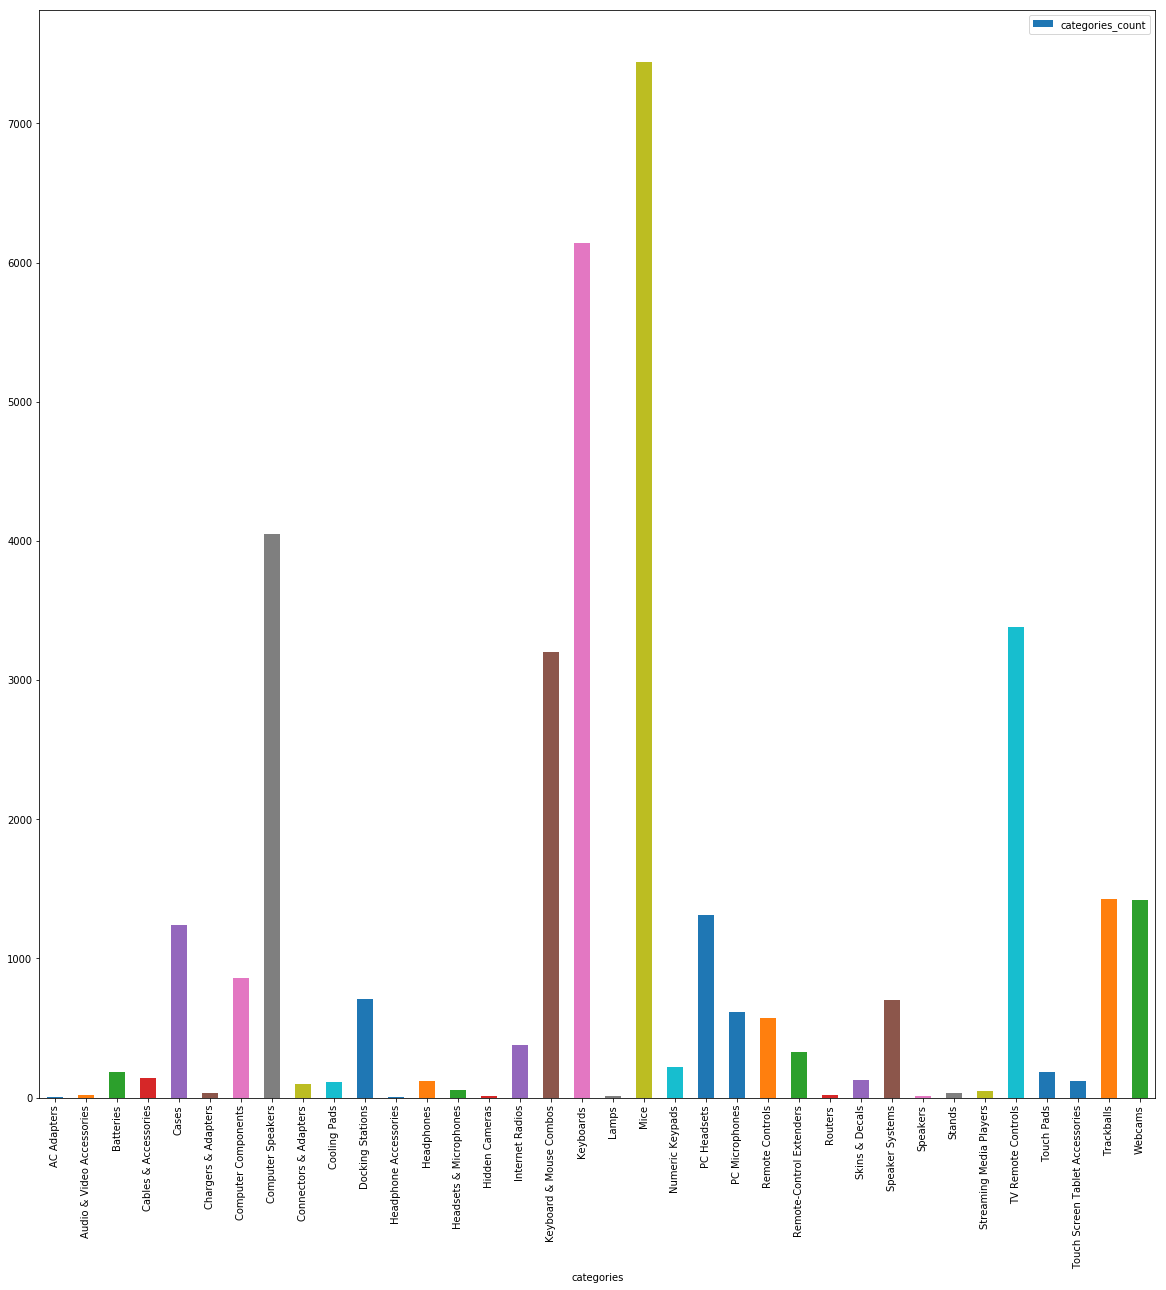

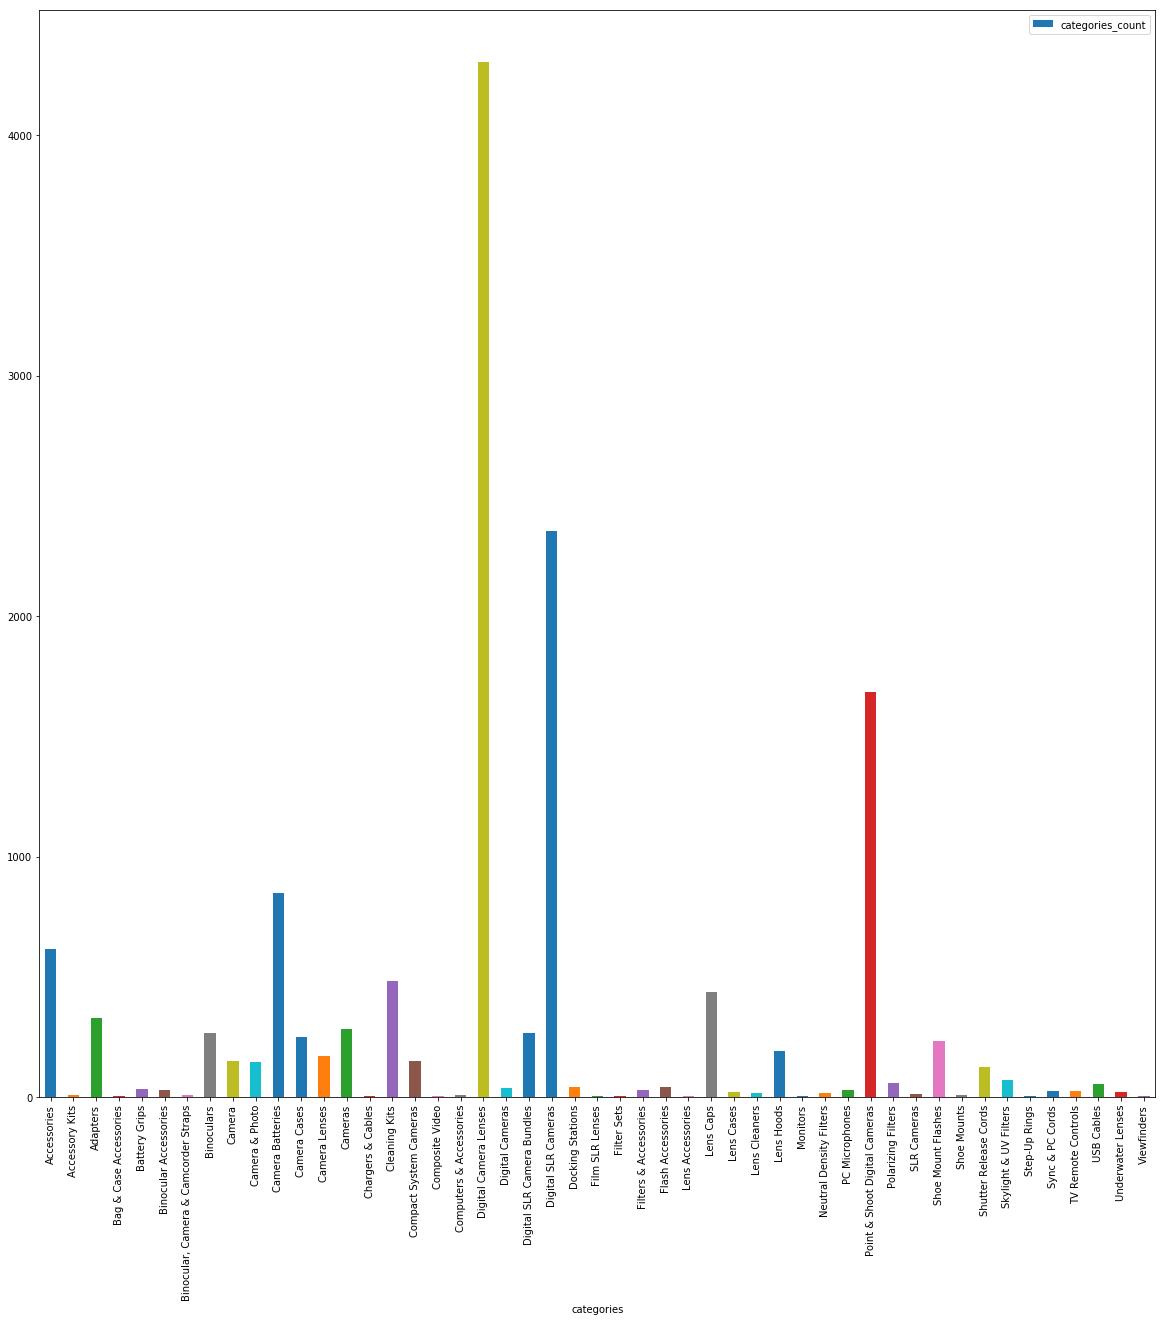

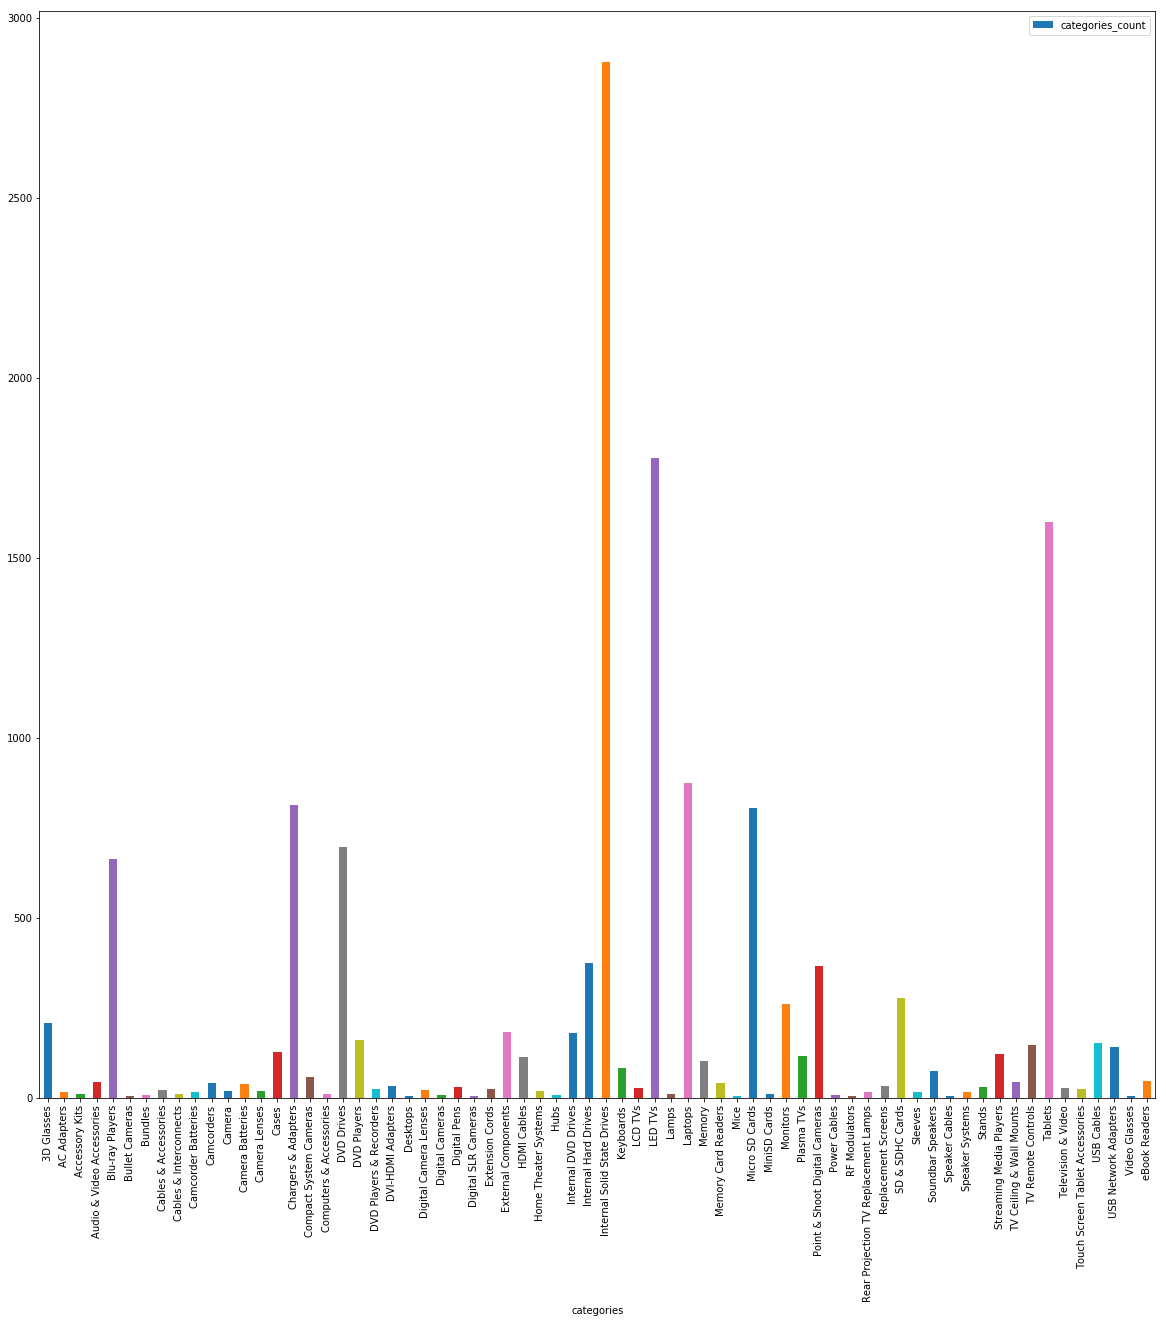

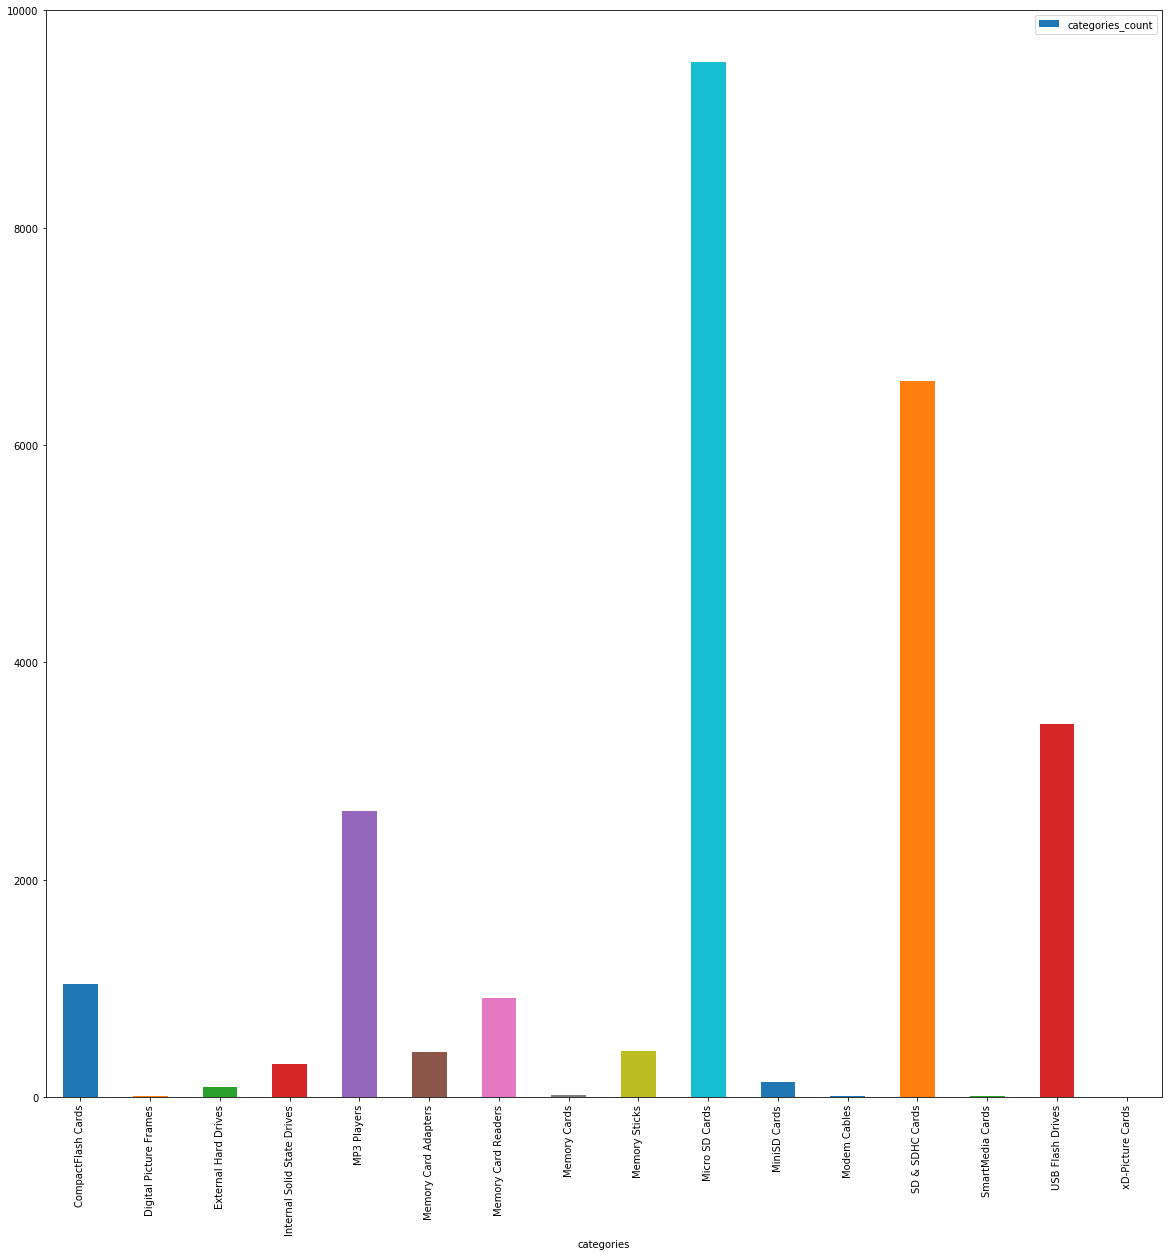

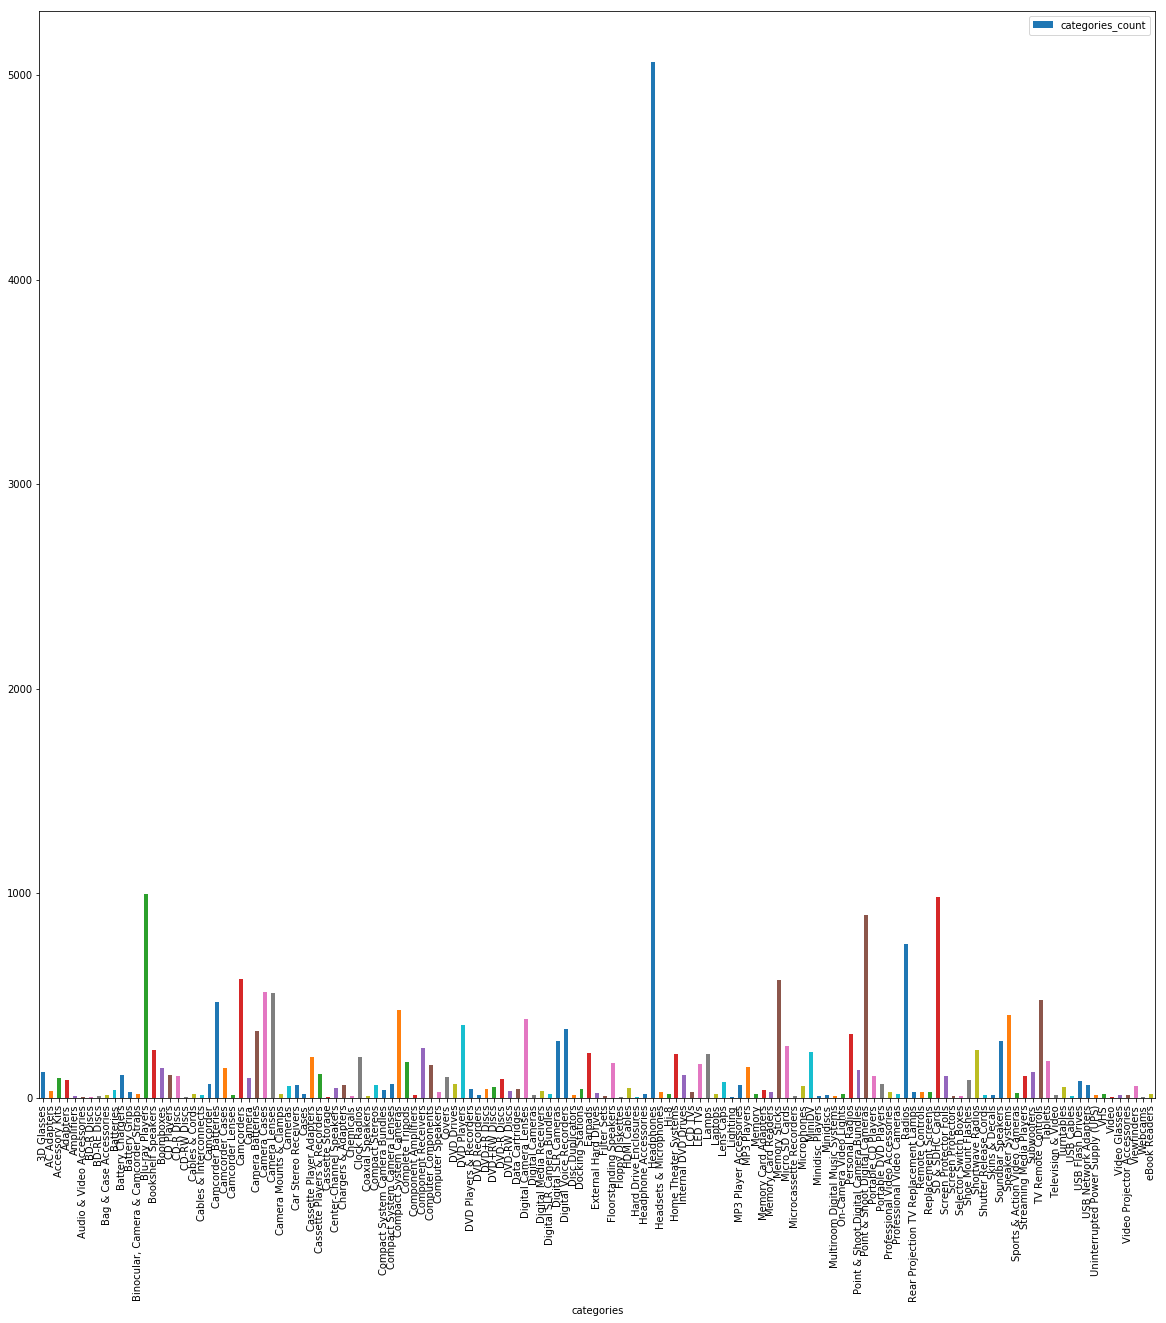

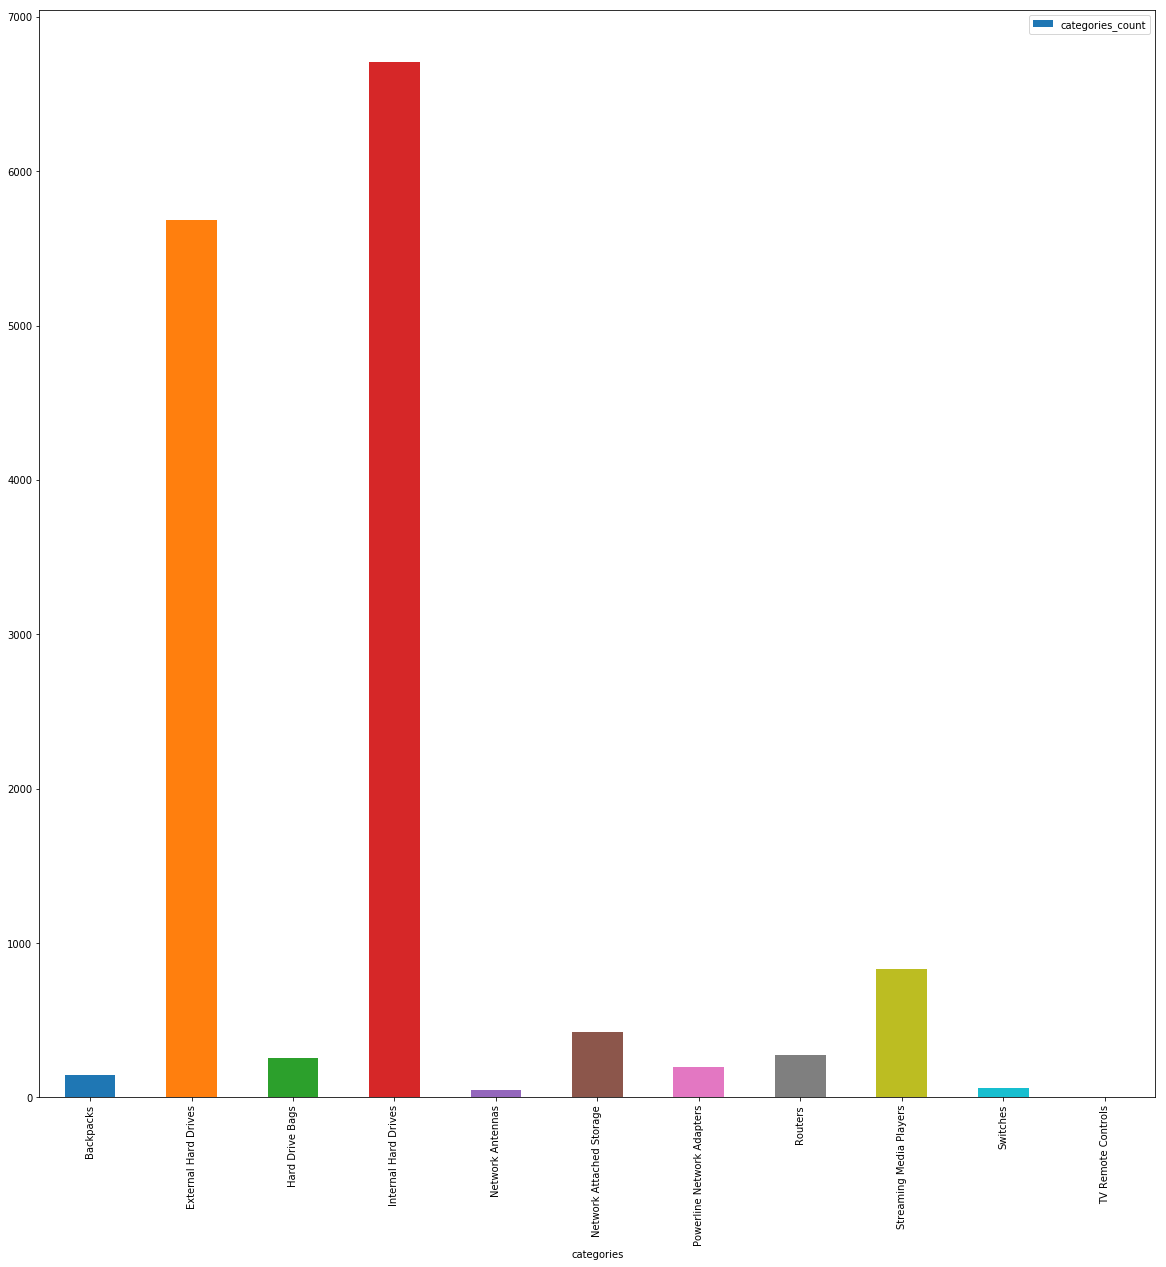

In [175]:
i = 1
fig = top_brand_categories_gb_brand.plot(x = 'categories', y = 'categories_count',kind="bar", figsize =(20,20))
fig.set_title(top_brand_categories_gb_brand.brand)
plt.xlabel("Categories")
plt.ylabel("Categories count")

plt.tight_layout()
save_file_name = 'brands_by_categories_bar_plot'+ str(i)+'.png'
plt.savefig(save_file_name)
plt.show()
i = i + 1

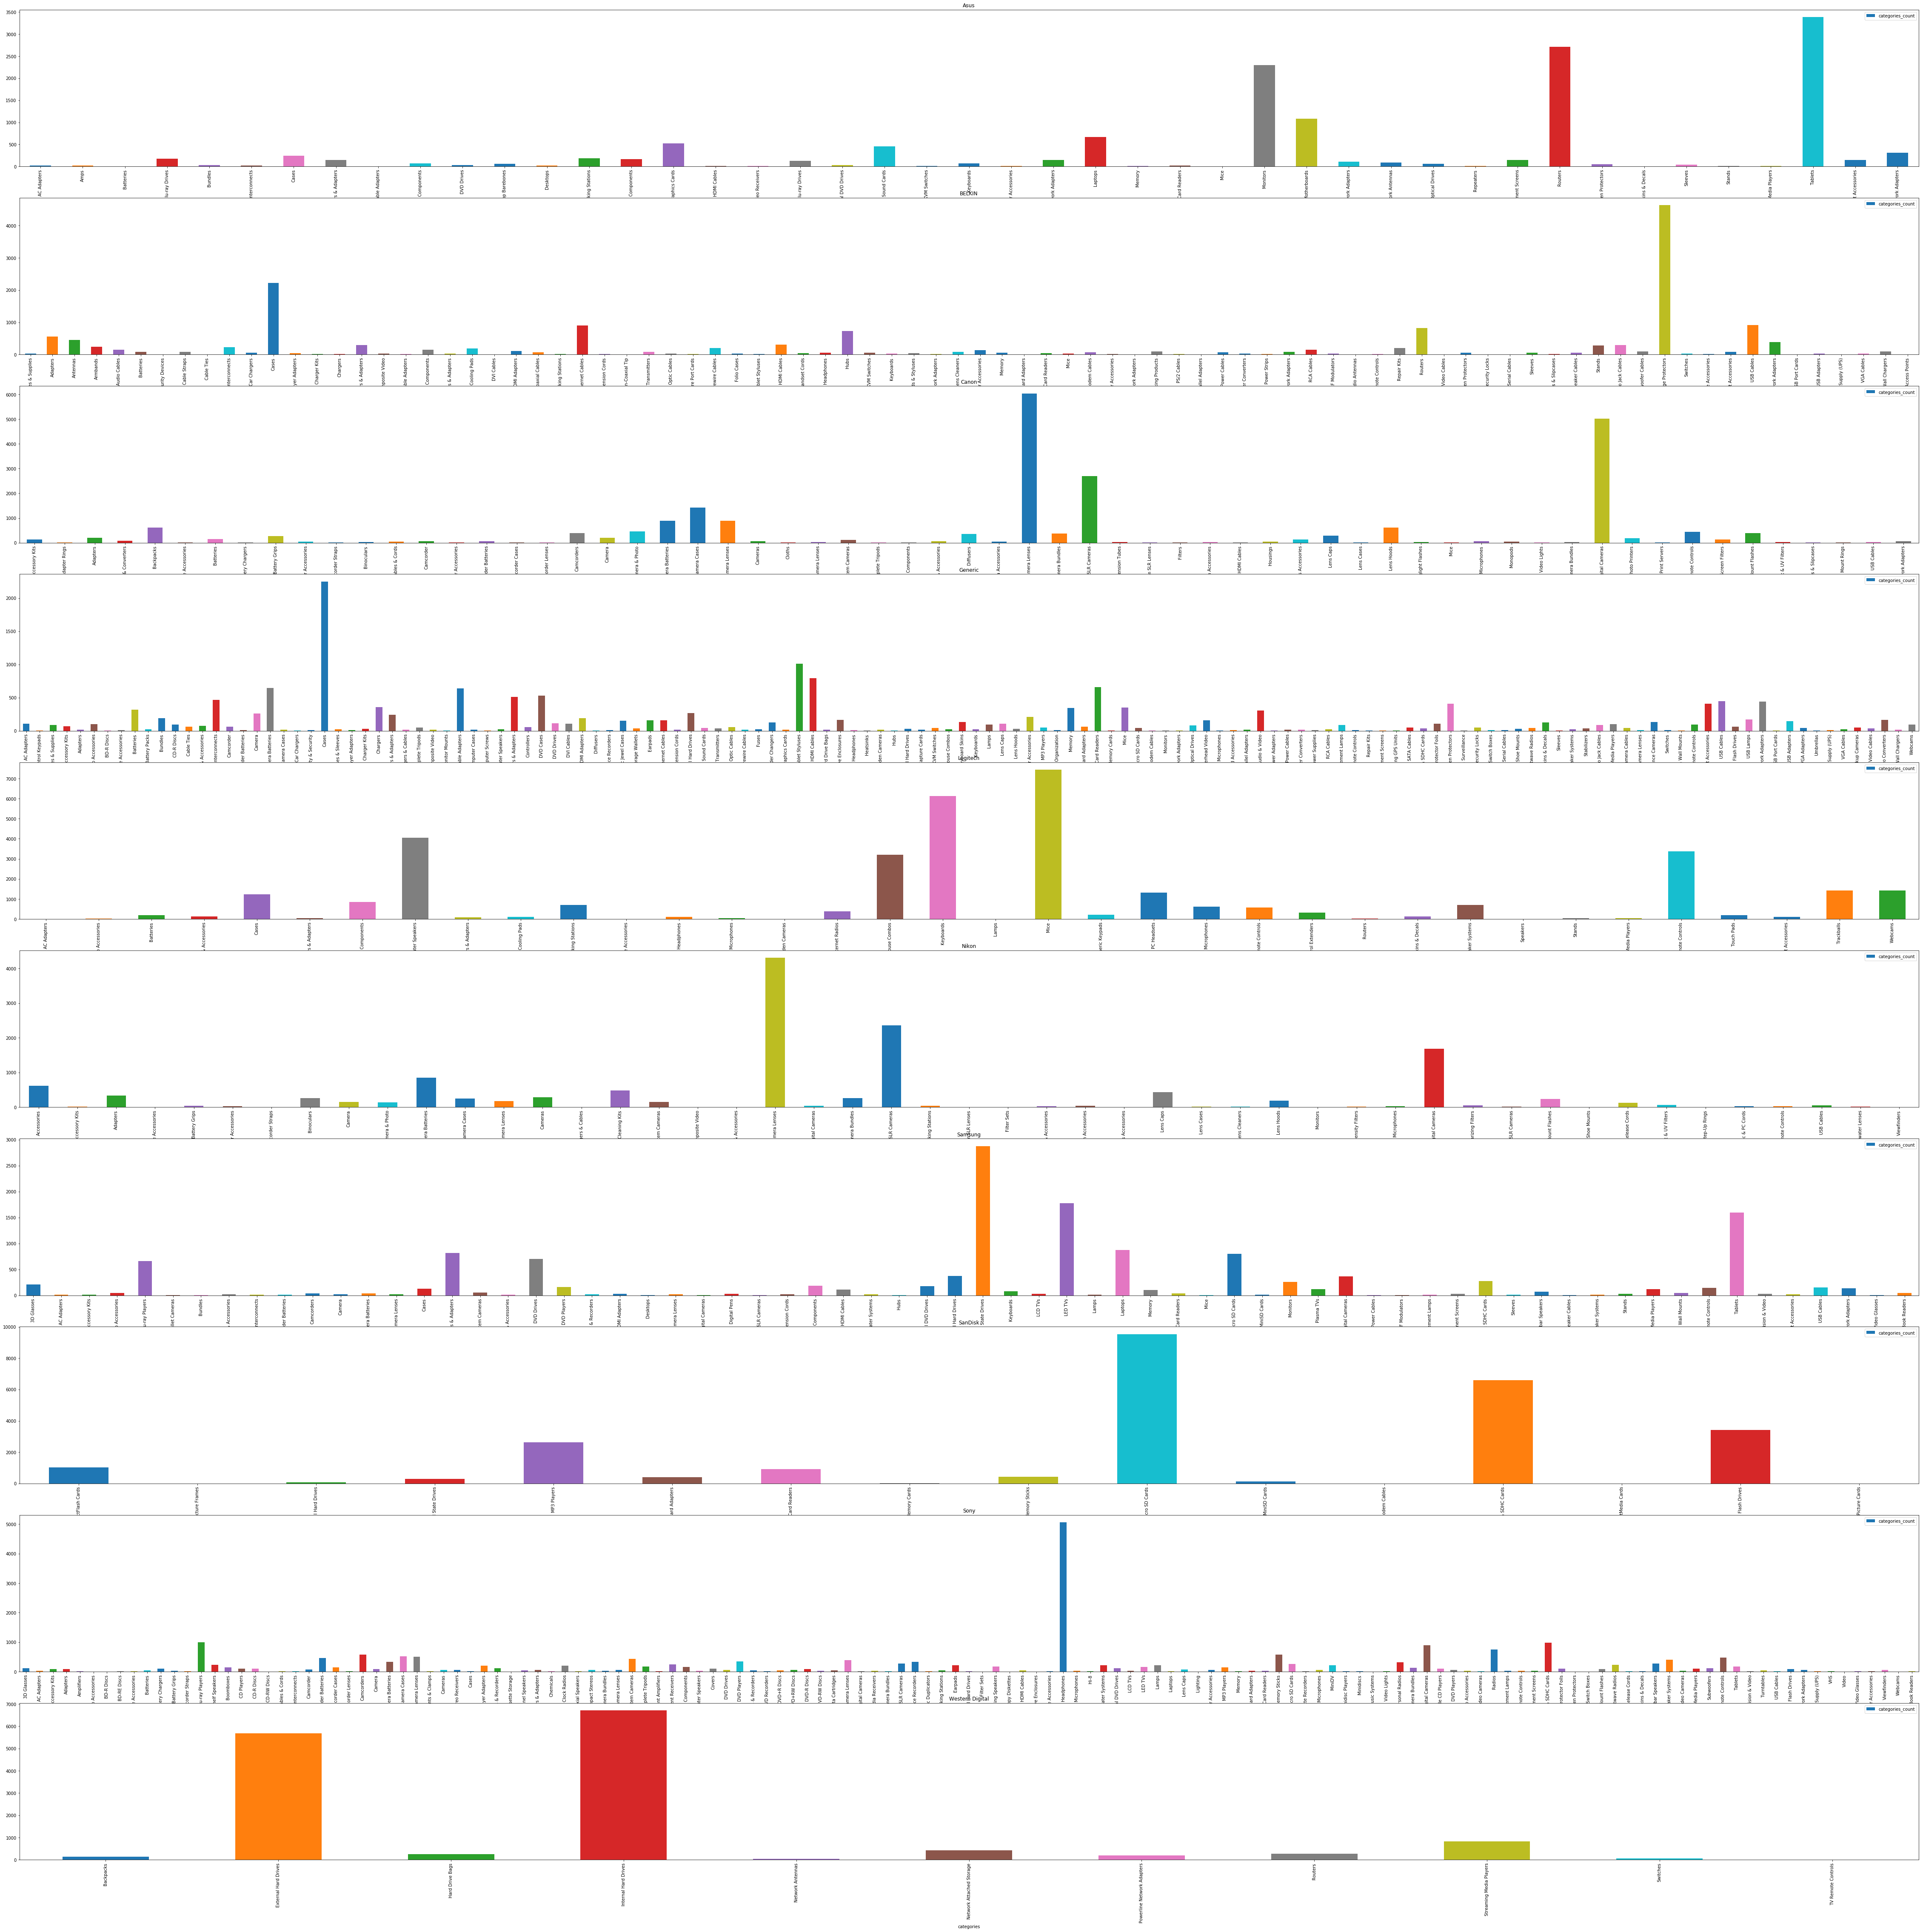

In [178]:
fig, axs = plt.subplots(5,2)

for (name, df), ax in zip(top_brand_categories_gb_brand, axs.flat):
    df.plot(x='categories',y='categories_count', ax = ax, kind= 'bar',figsize =(80,80), subplots = False)
    fig = plt.gcf()
    ax.set_title(name)
    save_file_name = 'brands_by_categories_bar_plot'+ name+'.png'
    plt.savefig(save_file_name)
   

In [121]:
# fig, axs = plt.subplots(5,2)

# for (name, df) in zip(top_brand_categories_gb_brand.brand,top_brand_categories_gb_brand):
#     df.plot(x='categories',y='categories_count', ax = ax, kind= 'pie',figsize =(80,80), subplots = False)
# #     df.plot(kind='bar', barmode='stack', filename='cufflinks/grouped-bar-chart')
# #     fig = plt.gcf()
#     fig = ax.get_figure()

# #     df.title(name)
# #     df.plot(x='categories',y='categories_count', ax=ax, kind ='bar',figsize =(80,80),subplots = False)
#     ax.set_title(name)
# #     axs = axs.next()
#     save_file_name = 'brands_by_categories_pie_plot'+ name+'.png'
#     fig.savefig(save_file_name)
    
   

KeyboardInterrupt: 

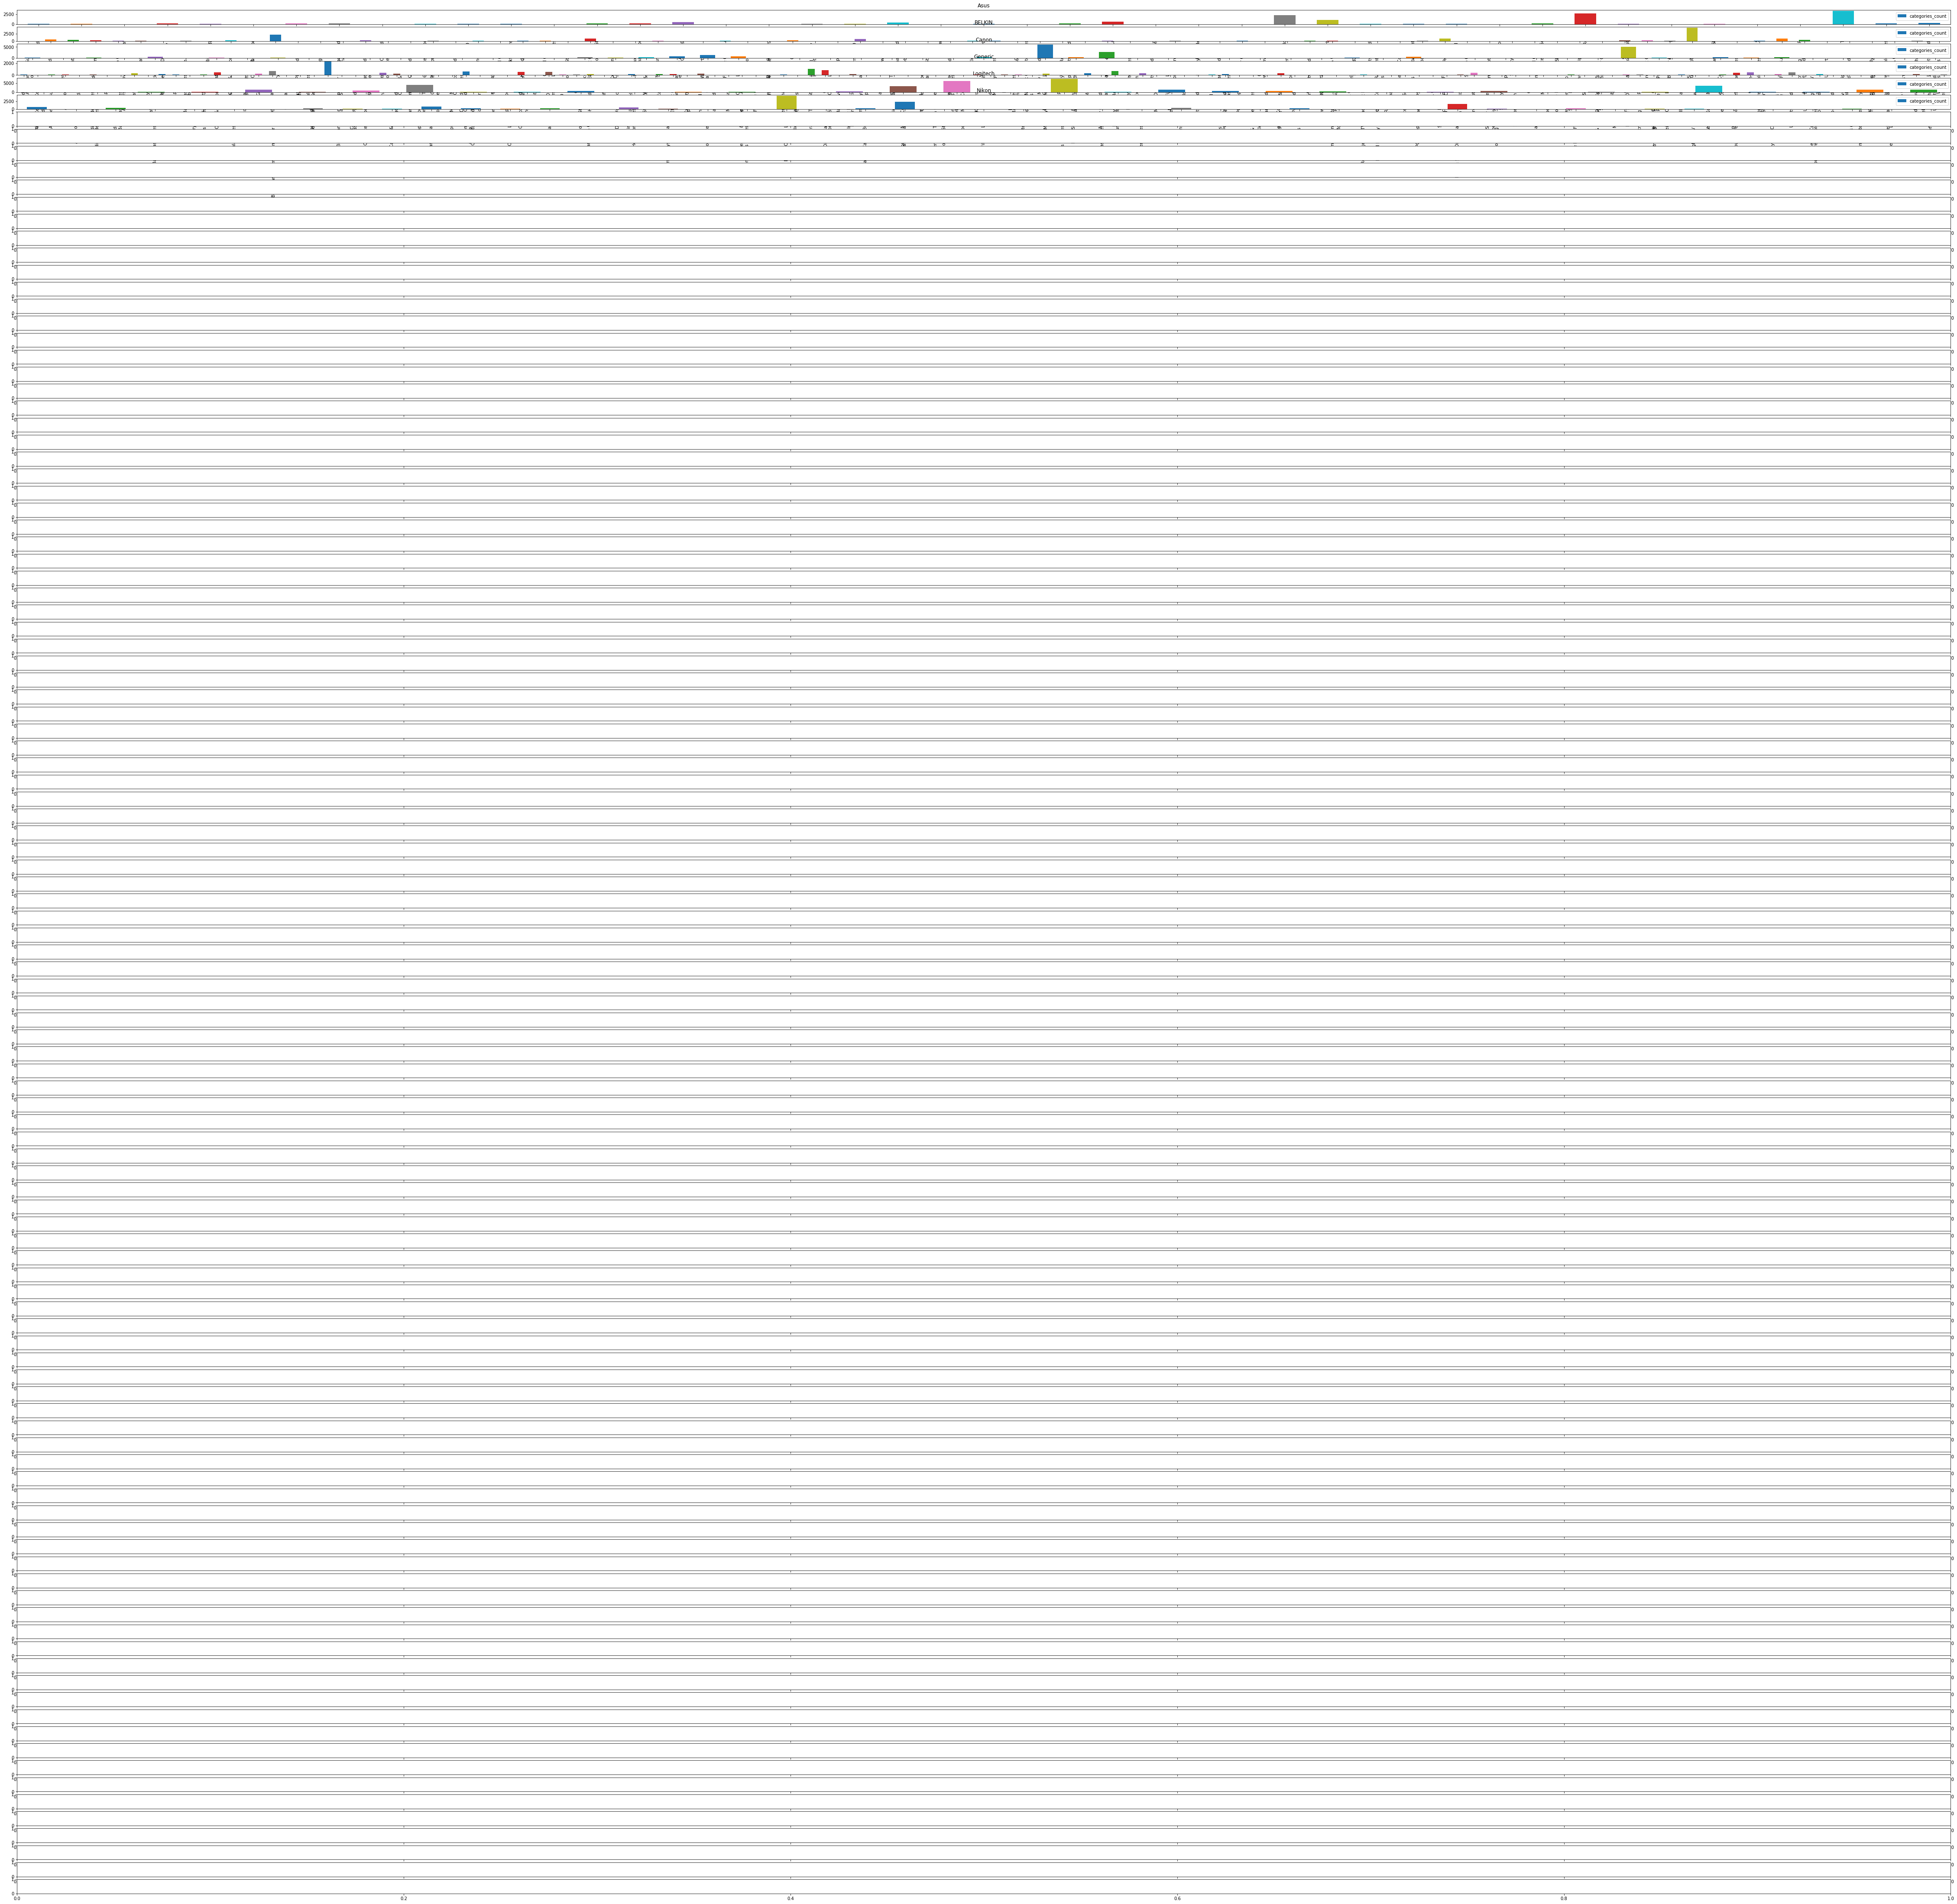

In [120]:
fig, axs = plt.subplots(111)

for (name, df), ax in zip(top_brand_categories_gb_brand, axs):
    df.plot(x='categories',y='categories_count', ax = ax, kind= 'bar',figsize =(80,80), subplots = False)
    fig = plt.gcf()
    ax.set_title(name)
    save_file_name = 'brands_by_categories_bar_plot'+ name+'.png'
    plt.savefig(save_file_name)
   

In [141]:
categories_plot = top_brand_categories_gb_brand.categories
print(categories_plot.head())

0                      AC Adapters
1                             Amps
2                        Batteries
3                   Blu-ray Drives
4                          Bundles
45          Accessories & Supplies
46                        Adapters
47                        Antennas
48                        Armbands
49                    Audio Cables
131                 Accessory Kits
132                  Adapter Rings
133                       Adapters
134          Adapters & Converters
135                      Backpacks
194                    AC Adapters
195         Access-Control Keypads
196         Accessories & Supplies
197                 Accessory Kits
198                       Adapters
334                    AC Adapters
335      Audio & Video Accessories
336                      Batteries
337           Cables & Accessories
338                          Cases
370                    Accessories
371                 Accessory Kits
372                       Adapters
373         Bag & Ca

In [153]:
import plotly.plotly as py
import plotly.graph_objs as go



In [173]:
def plot_graph(brand, cat_list, count_list):
    print("brand",brand)
    print("cat_list",cat_list)
    print("count_list",count_list)
    fig = {
        "data": [go.Bar(
                x=cat_list,
                y=count_list
        )]}
    
    save_file_name = brand + 'basic_bar'
    py.plot(fig, filename= save_file_name)

In [176]:
def plot_graph_new(brand, cat_list, count_list):
    print("brand",brand)
    print("cat_list",cat_list)
    print("count_list",count_list)
    save_file_name = brand + '_bar'
    
    
    plt.plot(x = cat_list, y = count_list)
    plt.title(brand)
    plt.tight_layout()
    
    plt.savefig(save_file_name)
    plt.show()

Br Asus
brand Asus
cat_list 0                               AC Adapters
1                                      Amps
2                                 Batteries
3                            Blu-ray Drives
4                                   Bundles
5                    Cables & Interconnects
6                                     Cases
7                       Chargers & Adapters
8                   Computer Cable Adapters
9                       Computer Components
10                               DVD Drives
11                        Desktop Barebones
12                                 Desktops
13                         Docking Stations
14                      External Components
15                           Graphics Cards
16                              HDMI Cables
17            In-Dash DVD & Video Receivers
18                  Internal Blu-ray Drives
19                      Internal DVD Drives
20                     Internal Sound Cards
21                             KVM Switches
22  

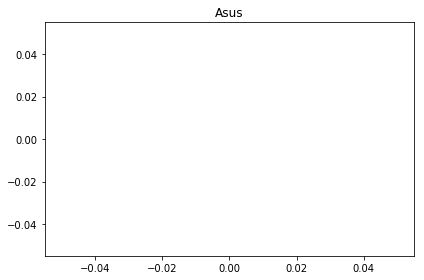

brand BELKIN
cat_list 45               Accessories & Supplies
46                             Adapters
47                             Antennas
48                             Armbands
49                         Audio Cables
50                            Batteries
51               Cable Security Devices
52                         Cable Straps
53                           Cable Ties
54               Cables & Interconnects
55                         Car Chargers
56                                Cases
57             Cassette Player Adapters
58                         Charger Kits
59                             Chargers
60                  Chargers & Adapters
61                      Composite Video
62              Computer Cable Adapters
63                  Computer Components
64                Connectors & Adapters
65                         Cooling Pads
66                           DVI Cables
67                    DVI-HDMI Adapters
68               Digital Coaxial Cables
69                

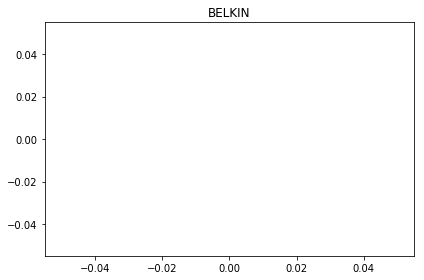

brand Canon
cat_list 131                          Accessory Kits
132                           Adapter Rings
133                                Adapters
134                   Adapters & Converters
135                               Backpacks
136                  Bag & Case Accessories
137                               Batteries
138                        Battery Chargers
139                           Battery Grips
140                   Binocular Accessories
141    Binocular, Camera & Camcorder Straps
142                              Binoculars
143                          Cables & Cords
144                               Camcorder
145                   Camcorder Accessories
146                     Camcorder Batteries
147                         Camcorder Cases
148                        Camcorder Lenses
149                              Camcorders
150                                  Camera
151                          Camera & Photo
152                        Camera Batteries
153        

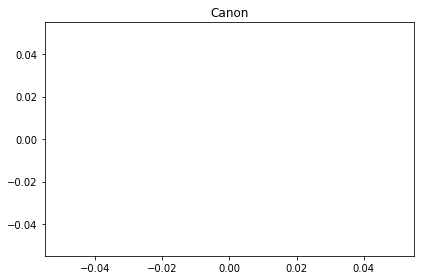

brand Generic
cat_list 194                         AC Adapters
195              Access-Control Keypads
196              Accessories & Supplies
197                      Accessory Kits
198                            Adapters
199           Audio & Video Accessories
200                          BD-R Discs
201              Bag & Case Accessories
202                           Batteries
203                       Battery Packs
204                             Bundles
205                          CD-R Discs
206                          Cable Ties
207                Cables & Accessories
208              Cables & Interconnects
209                           Camcorder
210                 Camcorder Batteries
211                              Camera
212                    Camera Batteries
213                        Camera Cases
214                        Car Chargers
215               Car Safety & Security
216                               Cases
217                     Cases & Sleeves
218            Ca

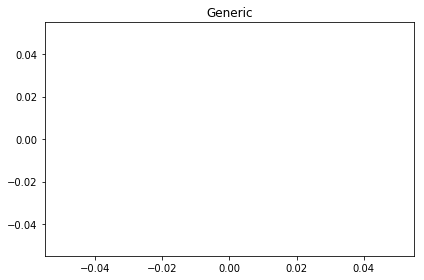

brand Logitech
cat_list 334                        AC Adapters
335          Audio & Video Accessories
336                          Batteries
337               Cables & Accessories
338                              Cases
339                Chargers & Adapters
340                Computer Components
341                  Computer Speakers
342              Connectors & Adapters
343                       Cooling Pads
344                   Docking Stations
345              Headphone Accessories
346                         Headphones
347             Headsets & Microphones
348                     Hidden Cameras
349                    Internet Radios
350            Keyboard & Mouse Combos
351                          Keyboards
352                              Lamps
353                               Mice
354                    Numeric Keypads
355                        PC Headsets
356                     PC Microphones
357                    Remote Controls
358           Remote-Control Extenders
3

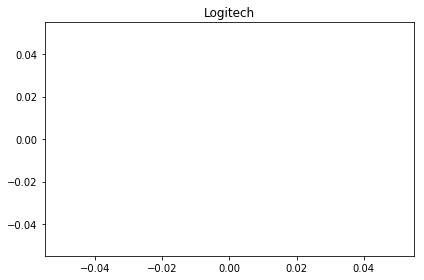

brand Nikon
cat_list 370                             Accessories
371                          Accessory Kits
372                                Adapters
373                  Bag & Case Accessories
374                           Battery Grips
375                   Binocular Accessories
376    Binocular, Camera & Camcorder Straps
377                              Binoculars
378                                  Camera
379                          Camera & Photo
380                        Camera Batteries
381                            Camera Cases
382                           Camera Lenses
383                                 Cameras
384                       Chargers & Cables
385                           Cleaning Kits
386                  Compact System Cameras
387                         Composite Video
388                 Computers & Accessories
389                   Digital Camera Lenses
390                         Digital Cameras
391              Digital SLR Camera Bundles
392        

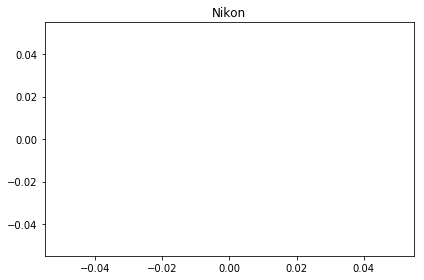

brand Samsung
cat_list 419                              3D Glasses
420                             AC Adapters
421                          Accessory Kits
422               Audio & Video Accessories
423                         Blu-ray Players
424                          Bullet Cameras
425                                 Bundles
426                    Cables & Accessories
427                  Cables & Interconnects
428                     Camcorder Batteries
429                              Camcorders
430                                  Camera
431                        Camera Batteries
432                           Camera Lenses
433                                   Cases
434                     Chargers & Adapters
435                  Compact System Cameras
436                 Computers & Accessories
437                              DVD Drives
438                             DVD Players
439                 DVD Players & Recorders
440                       DVI-HDMI Adapters
441      

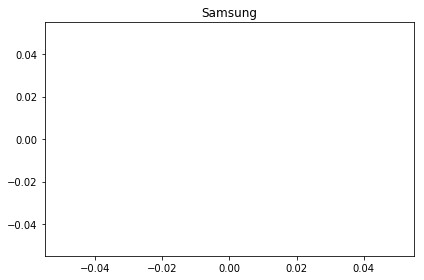

brand SanDisk
cat_list 487             CompactFlash Cards
488         Digital Picture Frames
489           External Hard Drives
490    Internal Solid State Drives
491                    MP3 Players
492           Memory Card Adapters
493            Memory Card Readers
494                   Memory Cards
495                  Memory Sticks
496                 Micro SD Cards
497                   MiniSD Cards
498                   Modem Cables
499                SD & SDHC Cards
500               SmartMedia Cards
501               USB Flash Drives
502               xD-Picture Cards
Name: categories, dtype: object
count_list 487    1036
488       6
489      92
490     303
491    2633
492     418
493     909
494      16
495     421
496    9528
497     137
498      10
499    6592
500       9
501    3430
502       5
Name: categories_count, dtype: int64


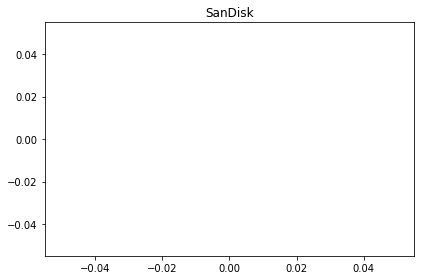

brand Sony
cat_list 503                              3D Glasses
504                             AC Adapters
505                          Accessory Kits
506                                Adapters
507                              Amplifiers
508               Audio & Video Accessories
509                              BD-R Discs
510                             BD-RE Discs
511                  Bag & Case Accessories
512                               Batteries
513                        Battery Chargers
514                           Battery Grips
515    Binocular, Camera & Camcorder Straps
516                         Blu-ray Players
517                      Bookshelf Speakers
518                               Boomboxes
519                              CD Players
520                              CD-R Discs
521                             CD-RW Discs
522                          Cables & Cords
523                  Cables & Interconnects
524                               Camcorder
525         

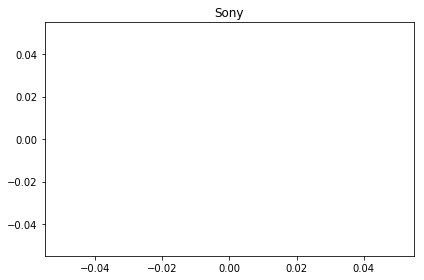

brand Western Digital
cat_list 644                     Backpacks
645          External Hard Drives
646               Hard Drive Bags
647          Internal Hard Drives
648              Network Antennas
649      Network Attached Storage
650    Powerline Network Adapters
651                       Routers
652       Streaming Media Players
653                      Switches
654            TV Remote Controls
Name: categories, dtype: object
count_list 644     147
645    5683
646     254
647    6708
648      49
649     421
650     200
651     278
652     829
653      58
654       5
Name: categories_count, dtype: int64


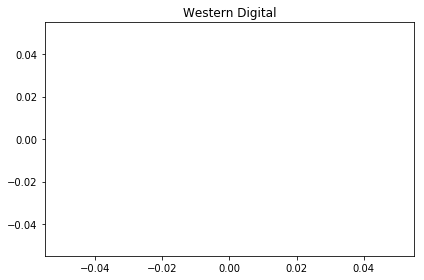

Br BELKIN
brand Asus
cat_list 0                               AC Adapters
1                                      Amps
2                                 Batteries
3                            Blu-ray Drives
4                                   Bundles
5                    Cables & Interconnects
6                                     Cases
7                       Chargers & Adapters
8                   Computer Cable Adapters
9                       Computer Components
10                               DVD Drives
11                        Desktop Barebones
12                                 Desktops
13                         Docking Stations
14                      External Components
15                           Graphics Cards
16                              HDMI Cables
17            In-Dash DVD & Video Receivers
18                  Internal Blu-ray Drives
19                      Internal DVD Drives
20                     Internal Sound Cards
21                             KVM Switches
22

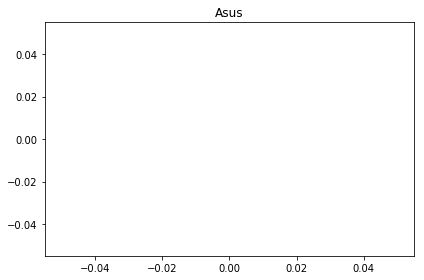

brand BELKIN
cat_list 45               Accessories & Supplies
46                             Adapters
47                             Antennas
48                             Armbands
49                         Audio Cables
50                            Batteries
51               Cable Security Devices
52                         Cable Straps
53                           Cable Ties
54               Cables & Interconnects
55                         Car Chargers
56                                Cases
57             Cassette Player Adapters
58                         Charger Kits
59                             Chargers
60                  Chargers & Adapters
61                      Composite Video
62              Computer Cable Adapters
63                  Computer Components
64                Connectors & Adapters
65                         Cooling Pads
66                           DVI Cables
67                    DVI-HDMI Adapters
68               Digital Coaxial Cables
69                

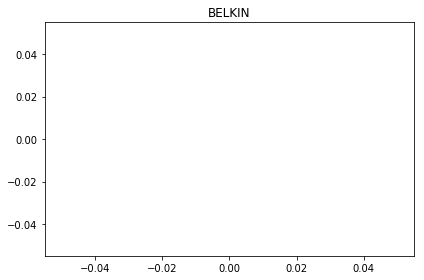

brand Canon
cat_list 131                          Accessory Kits
132                           Adapter Rings
133                                Adapters
134                   Adapters & Converters
135                               Backpacks
136                  Bag & Case Accessories
137                               Batteries
138                        Battery Chargers
139                           Battery Grips
140                   Binocular Accessories
141    Binocular, Camera & Camcorder Straps
142                              Binoculars
143                          Cables & Cords
144                               Camcorder
145                   Camcorder Accessories
146                     Camcorder Batteries
147                         Camcorder Cases
148                        Camcorder Lenses
149                              Camcorders
150                                  Camera
151                          Camera & Photo
152                        Camera Batteries
153        

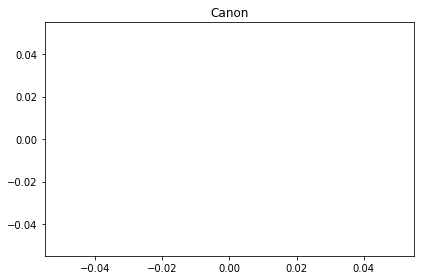

brand Generic
cat_list 194                         AC Adapters
195              Access-Control Keypads
196              Accessories & Supplies
197                      Accessory Kits
198                            Adapters
199           Audio & Video Accessories
200                          BD-R Discs
201              Bag & Case Accessories
202                           Batteries
203                       Battery Packs
204                             Bundles
205                          CD-R Discs
206                          Cable Ties
207                Cables & Accessories
208              Cables & Interconnects
209                           Camcorder
210                 Camcorder Batteries
211                              Camera
212                    Camera Batteries
213                        Camera Cases
214                        Car Chargers
215               Car Safety & Security
216                               Cases
217                     Cases & Sleeves
218            Ca

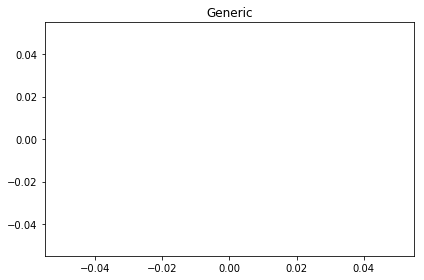

brand Logitech
cat_list 334                        AC Adapters
335          Audio & Video Accessories
336                          Batteries
337               Cables & Accessories
338                              Cases
339                Chargers & Adapters
340                Computer Components
341                  Computer Speakers
342              Connectors & Adapters
343                       Cooling Pads
344                   Docking Stations
345              Headphone Accessories
346                         Headphones
347             Headsets & Microphones
348                     Hidden Cameras
349                    Internet Radios
350            Keyboard & Mouse Combos
351                          Keyboards
352                              Lamps
353                               Mice
354                    Numeric Keypads
355                        PC Headsets
356                     PC Microphones
357                    Remote Controls
358           Remote-Control Extenders
3

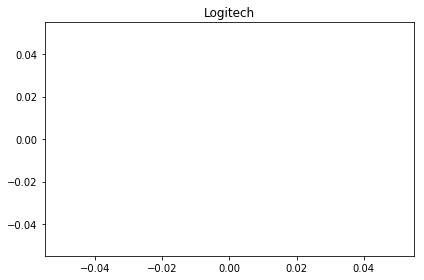

brand Nikon
cat_list 370                             Accessories
371                          Accessory Kits
372                                Adapters
373                  Bag & Case Accessories
374                           Battery Grips
375                   Binocular Accessories
376    Binocular, Camera & Camcorder Straps
377                              Binoculars
378                                  Camera
379                          Camera & Photo
380                        Camera Batteries
381                            Camera Cases
382                           Camera Lenses
383                                 Cameras
384                       Chargers & Cables
385                           Cleaning Kits
386                  Compact System Cameras
387                         Composite Video
388                 Computers & Accessories
389                   Digital Camera Lenses
390                         Digital Cameras
391              Digital SLR Camera Bundles
392        

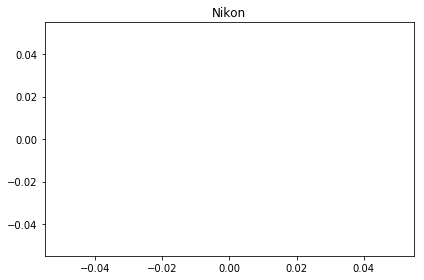

brand Samsung
cat_list 419                              3D Glasses
420                             AC Adapters
421                          Accessory Kits
422               Audio & Video Accessories
423                         Blu-ray Players
424                          Bullet Cameras
425                                 Bundles
426                    Cables & Accessories
427                  Cables & Interconnects
428                     Camcorder Batteries
429                              Camcorders
430                                  Camera
431                        Camera Batteries
432                           Camera Lenses
433                                   Cases
434                     Chargers & Adapters
435                  Compact System Cameras
436                 Computers & Accessories
437                              DVD Drives
438                             DVD Players
439                 DVD Players & Recorders
440                       DVI-HDMI Adapters
441      

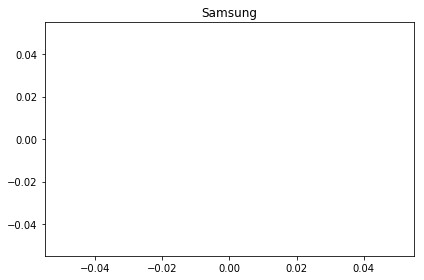

brand SanDisk
cat_list 487             CompactFlash Cards
488         Digital Picture Frames
489           External Hard Drives
490    Internal Solid State Drives
491                    MP3 Players
492           Memory Card Adapters
493            Memory Card Readers
494                   Memory Cards
495                  Memory Sticks
496                 Micro SD Cards
497                   MiniSD Cards
498                   Modem Cables
499                SD & SDHC Cards
500               SmartMedia Cards
501               USB Flash Drives
502               xD-Picture Cards
Name: categories, dtype: object
count_list 487    1036
488       6
489      92
490     303
491    2633
492     418
493     909
494      16
495     421
496    9528
497     137
498      10
499    6592
500       9
501    3430
502       5
Name: categories_count, dtype: int64


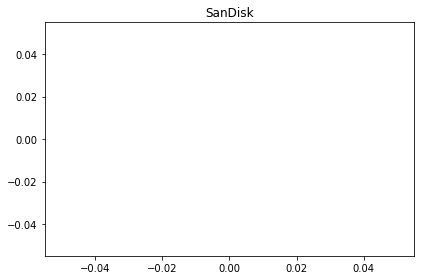

brand Sony
cat_list 503                              3D Glasses
504                             AC Adapters
505                          Accessory Kits
506                                Adapters
507                              Amplifiers
508               Audio & Video Accessories
509                              BD-R Discs
510                             BD-RE Discs
511                  Bag & Case Accessories
512                               Batteries
513                        Battery Chargers
514                           Battery Grips
515    Binocular, Camera & Camcorder Straps
516                         Blu-ray Players
517                      Bookshelf Speakers
518                               Boomboxes
519                              CD Players
520                              CD-R Discs
521                             CD-RW Discs
522                          Cables & Cords
523                  Cables & Interconnects
524                               Camcorder
525         

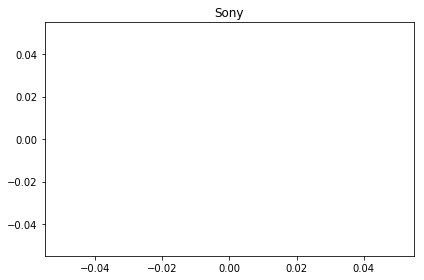

brand Western Digital
cat_list 644                     Backpacks
645          External Hard Drives
646               Hard Drive Bags
647          Internal Hard Drives
648              Network Antennas
649      Network Attached Storage
650    Powerline Network Adapters
651                       Routers
652       Streaming Media Players
653                      Switches
654            TV Remote Controls
Name: categories, dtype: object
count_list 644     147
645    5683
646     254
647    6708
648      49
649     421
650     200
651     278
652     829
653      58
654       5
Name: categories_count, dtype: int64


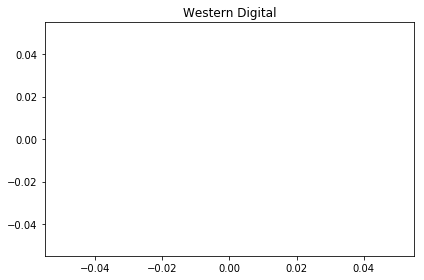

Br Canon
brand Asus
cat_list 0                               AC Adapters
1                                      Amps
2                                 Batteries
3                            Blu-ray Drives
4                                   Bundles
5                    Cables & Interconnects
6                                     Cases
7                       Chargers & Adapters
8                   Computer Cable Adapters
9                       Computer Components
10                               DVD Drives
11                        Desktop Barebones
12                                 Desktops
13                         Docking Stations
14                      External Components
15                           Graphics Cards
16                              HDMI Cables
17            In-Dash DVD & Video Receivers
18                  Internal Blu-ray Drives
19                      Internal DVD Drives
20                     Internal Sound Cards
21                             KVM Switches
22 

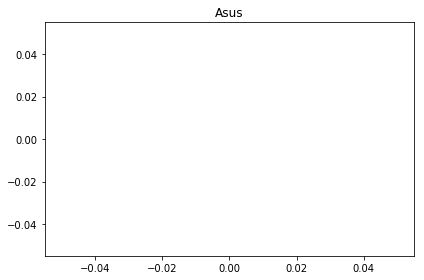

brand BELKIN
cat_list 45               Accessories & Supplies
46                             Adapters
47                             Antennas
48                             Armbands
49                         Audio Cables
50                            Batteries
51               Cable Security Devices
52                         Cable Straps
53                           Cable Ties
54               Cables & Interconnects
55                         Car Chargers
56                                Cases
57             Cassette Player Adapters
58                         Charger Kits
59                             Chargers
60                  Chargers & Adapters
61                      Composite Video
62              Computer Cable Adapters
63                  Computer Components
64                Connectors & Adapters
65                         Cooling Pads
66                           DVI Cables
67                    DVI-HDMI Adapters
68               Digital Coaxial Cables
69                

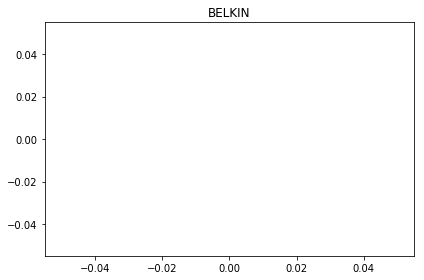

brand Canon
cat_list 131                          Accessory Kits
132                           Adapter Rings
133                                Adapters
134                   Adapters & Converters
135                               Backpacks
136                  Bag & Case Accessories
137                               Batteries
138                        Battery Chargers
139                           Battery Grips
140                   Binocular Accessories
141    Binocular, Camera & Camcorder Straps
142                              Binoculars
143                          Cables & Cords
144                               Camcorder
145                   Camcorder Accessories
146                     Camcorder Batteries
147                         Camcorder Cases
148                        Camcorder Lenses
149                              Camcorders
150                                  Camera
151                          Camera & Photo
152                        Camera Batteries
153        

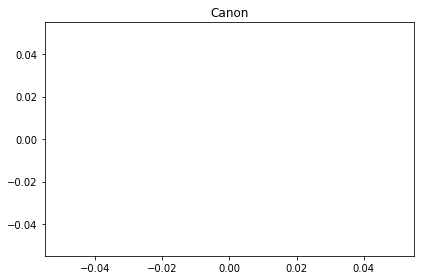

brand Generic
cat_list 194                         AC Adapters
195              Access-Control Keypads
196              Accessories & Supplies
197                      Accessory Kits
198                            Adapters
199           Audio & Video Accessories
200                          BD-R Discs
201              Bag & Case Accessories
202                           Batteries
203                       Battery Packs
204                             Bundles
205                          CD-R Discs
206                          Cable Ties
207                Cables & Accessories
208              Cables & Interconnects
209                           Camcorder
210                 Camcorder Batteries
211                              Camera
212                    Camera Batteries
213                        Camera Cases
214                        Car Chargers
215               Car Safety & Security
216                               Cases
217                     Cases & Sleeves
218            Ca

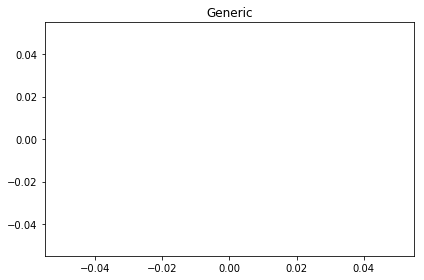

brand Logitech
cat_list 334                        AC Adapters
335          Audio & Video Accessories
336                          Batteries
337               Cables & Accessories
338                              Cases
339                Chargers & Adapters
340                Computer Components
341                  Computer Speakers
342              Connectors & Adapters
343                       Cooling Pads
344                   Docking Stations
345              Headphone Accessories
346                         Headphones
347             Headsets & Microphones
348                     Hidden Cameras
349                    Internet Radios
350            Keyboard & Mouse Combos
351                          Keyboards
352                              Lamps
353                               Mice
354                    Numeric Keypads
355                        PC Headsets
356                     PC Microphones
357                    Remote Controls
358           Remote-Control Extenders
3

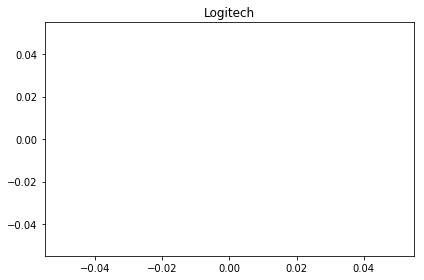

brand Nikon
cat_list 370                             Accessories
371                          Accessory Kits
372                                Adapters
373                  Bag & Case Accessories
374                           Battery Grips
375                   Binocular Accessories
376    Binocular, Camera & Camcorder Straps
377                              Binoculars
378                                  Camera
379                          Camera & Photo
380                        Camera Batteries
381                            Camera Cases
382                           Camera Lenses
383                                 Cameras
384                       Chargers & Cables
385                           Cleaning Kits
386                  Compact System Cameras
387                         Composite Video
388                 Computers & Accessories
389                   Digital Camera Lenses
390                         Digital Cameras
391              Digital SLR Camera Bundles
392        

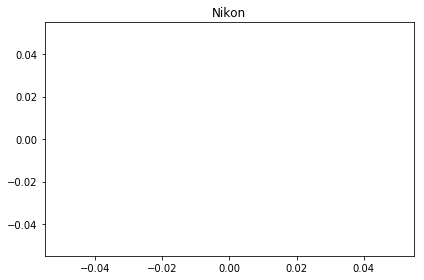

brand Samsung
cat_list 419                              3D Glasses
420                             AC Adapters
421                          Accessory Kits
422               Audio & Video Accessories
423                         Blu-ray Players
424                          Bullet Cameras
425                                 Bundles
426                    Cables & Accessories
427                  Cables & Interconnects
428                     Camcorder Batteries
429                              Camcorders
430                                  Camera
431                        Camera Batteries
432                           Camera Lenses
433                                   Cases
434                     Chargers & Adapters
435                  Compact System Cameras
436                 Computers & Accessories
437                              DVD Drives
438                             DVD Players
439                 DVD Players & Recorders
440                       DVI-HDMI Adapters
441      

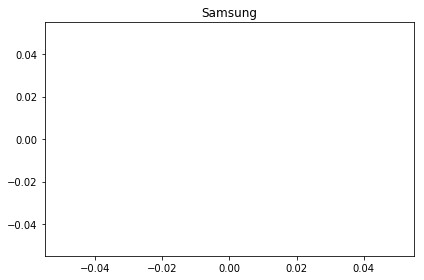

brand SanDisk
cat_list 487             CompactFlash Cards
488         Digital Picture Frames
489           External Hard Drives
490    Internal Solid State Drives
491                    MP3 Players
492           Memory Card Adapters
493            Memory Card Readers
494                   Memory Cards
495                  Memory Sticks
496                 Micro SD Cards
497                   MiniSD Cards
498                   Modem Cables
499                SD & SDHC Cards
500               SmartMedia Cards
501               USB Flash Drives
502               xD-Picture Cards
Name: categories, dtype: object
count_list 487    1036
488       6
489      92
490     303
491    2633
492     418
493     909
494      16
495     421
496    9528
497     137
498      10
499    6592
500       9
501    3430
502       5
Name: categories_count, dtype: int64


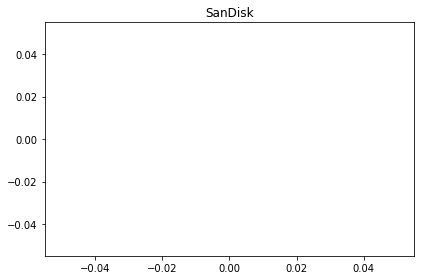

brand Sony
cat_list 503                              3D Glasses
504                             AC Adapters
505                          Accessory Kits
506                                Adapters
507                              Amplifiers
508               Audio & Video Accessories
509                              BD-R Discs
510                             BD-RE Discs
511                  Bag & Case Accessories
512                               Batteries
513                        Battery Chargers
514                           Battery Grips
515    Binocular, Camera & Camcorder Straps
516                         Blu-ray Players
517                      Bookshelf Speakers
518                               Boomboxes
519                              CD Players
520                              CD-R Discs
521                             CD-RW Discs
522                          Cables & Cords
523                  Cables & Interconnects
524                               Camcorder
525         

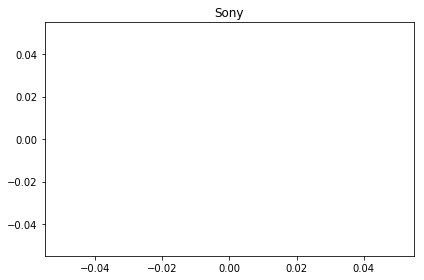

brand Western Digital
cat_list 644                     Backpacks
645          External Hard Drives
646               Hard Drive Bags
647          Internal Hard Drives
648              Network Antennas
649      Network Attached Storage
650    Powerline Network Adapters
651                       Routers
652       Streaming Media Players
653                      Switches
654            TV Remote Controls
Name: categories, dtype: object
count_list 644     147
645    5683
646     254
647    6708
648      49
649     421
650     200
651     278
652     829
653      58
654       5
Name: categories_count, dtype: int64


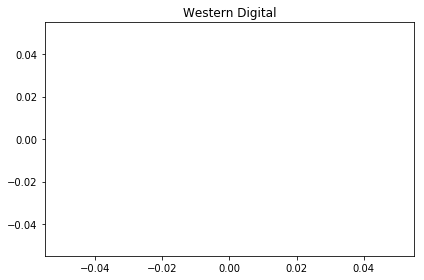

Br Generic
brand Asus
cat_list 0                               AC Adapters
1                                      Amps
2                                 Batteries
3                            Blu-ray Drives
4                                   Bundles
5                    Cables & Interconnects
6                                     Cases
7                       Chargers & Adapters
8                   Computer Cable Adapters
9                       Computer Components
10                               DVD Drives
11                        Desktop Barebones
12                                 Desktops
13                         Docking Stations
14                      External Components
15                           Graphics Cards
16                              HDMI Cables
17            In-Dash DVD & Video Receivers
18                  Internal Blu-ray Drives
19                      Internal DVD Drives
20                     Internal Sound Cards
21                             KVM Switches
2

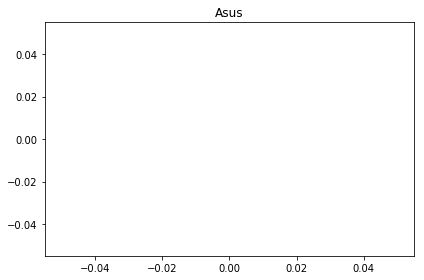

brand BELKIN
cat_list 45               Accessories & Supplies
46                             Adapters
47                             Antennas
48                             Armbands
49                         Audio Cables
50                            Batteries
51               Cable Security Devices
52                         Cable Straps
53                           Cable Ties
54               Cables & Interconnects
55                         Car Chargers
56                                Cases
57             Cassette Player Adapters
58                         Charger Kits
59                             Chargers
60                  Chargers & Adapters
61                      Composite Video
62              Computer Cable Adapters
63                  Computer Components
64                Connectors & Adapters
65                         Cooling Pads
66                           DVI Cables
67                    DVI-HDMI Adapters
68               Digital Coaxial Cables
69                

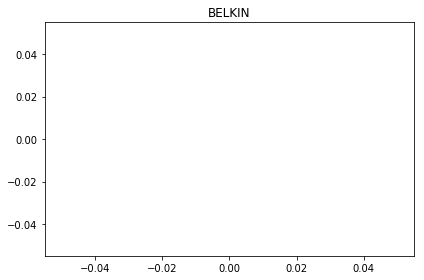

brand Canon
cat_list 131                          Accessory Kits
132                           Adapter Rings
133                                Adapters
134                   Adapters & Converters
135                               Backpacks
136                  Bag & Case Accessories
137                               Batteries
138                        Battery Chargers
139                           Battery Grips
140                   Binocular Accessories
141    Binocular, Camera & Camcorder Straps
142                              Binoculars
143                          Cables & Cords
144                               Camcorder
145                   Camcorder Accessories
146                     Camcorder Batteries
147                         Camcorder Cases
148                        Camcorder Lenses
149                              Camcorders
150                                  Camera
151                          Camera & Photo
152                        Camera Batteries
153        

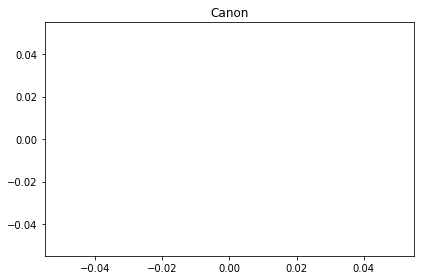

brand Generic
cat_list 194                         AC Adapters
195              Access-Control Keypads
196              Accessories & Supplies
197                      Accessory Kits
198                            Adapters
199           Audio & Video Accessories
200                          BD-R Discs
201              Bag & Case Accessories
202                           Batteries
203                       Battery Packs
204                             Bundles
205                          CD-R Discs
206                          Cable Ties
207                Cables & Accessories
208              Cables & Interconnects
209                           Camcorder
210                 Camcorder Batteries
211                              Camera
212                    Camera Batteries
213                        Camera Cases
214                        Car Chargers
215               Car Safety & Security
216                               Cases
217                     Cases & Sleeves
218            Ca

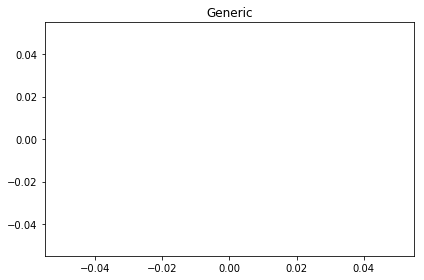

brand Logitech
cat_list 334                        AC Adapters
335          Audio & Video Accessories
336                          Batteries
337               Cables & Accessories
338                              Cases
339                Chargers & Adapters
340                Computer Components
341                  Computer Speakers
342              Connectors & Adapters
343                       Cooling Pads
344                   Docking Stations
345              Headphone Accessories
346                         Headphones
347             Headsets & Microphones
348                     Hidden Cameras
349                    Internet Radios
350            Keyboard & Mouse Combos
351                          Keyboards
352                              Lamps
353                               Mice
354                    Numeric Keypads
355                        PC Headsets
356                     PC Microphones
357                    Remote Controls
358           Remote-Control Extenders
3

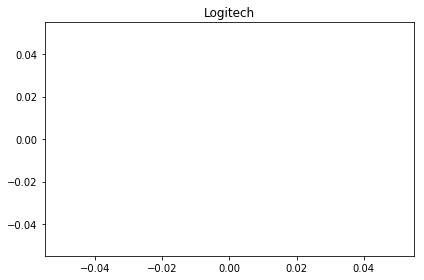

brand Nikon
cat_list 370                             Accessories
371                          Accessory Kits
372                                Adapters
373                  Bag & Case Accessories
374                           Battery Grips
375                   Binocular Accessories
376    Binocular, Camera & Camcorder Straps
377                              Binoculars
378                                  Camera
379                          Camera & Photo
380                        Camera Batteries
381                            Camera Cases
382                           Camera Lenses
383                                 Cameras
384                       Chargers & Cables
385                           Cleaning Kits
386                  Compact System Cameras
387                         Composite Video
388                 Computers & Accessories
389                   Digital Camera Lenses
390                         Digital Cameras
391              Digital SLR Camera Bundles
392        

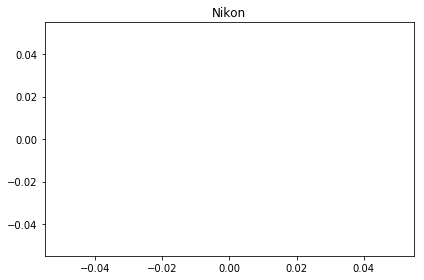

brand Samsung
cat_list 419                              3D Glasses
420                             AC Adapters
421                          Accessory Kits
422               Audio & Video Accessories
423                         Blu-ray Players
424                          Bullet Cameras
425                                 Bundles
426                    Cables & Accessories
427                  Cables & Interconnects
428                     Camcorder Batteries
429                              Camcorders
430                                  Camera
431                        Camera Batteries
432                           Camera Lenses
433                                   Cases
434                     Chargers & Adapters
435                  Compact System Cameras
436                 Computers & Accessories
437                              DVD Drives
438                             DVD Players
439                 DVD Players & Recorders
440                       DVI-HDMI Adapters
441      

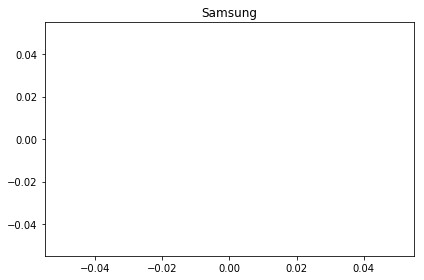

brand SanDisk
cat_list 487             CompactFlash Cards
488         Digital Picture Frames
489           External Hard Drives
490    Internal Solid State Drives
491                    MP3 Players
492           Memory Card Adapters
493            Memory Card Readers
494                   Memory Cards
495                  Memory Sticks
496                 Micro SD Cards
497                   MiniSD Cards
498                   Modem Cables
499                SD & SDHC Cards
500               SmartMedia Cards
501               USB Flash Drives
502               xD-Picture Cards
Name: categories, dtype: object
count_list 487    1036
488       6
489      92
490     303
491    2633
492     418
493     909
494      16
495     421
496    9528
497     137
498      10
499    6592
500       9
501    3430
502       5
Name: categories_count, dtype: int64


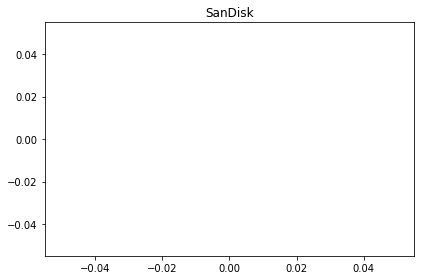

brand Sony
cat_list 503                              3D Glasses
504                             AC Adapters
505                          Accessory Kits
506                                Adapters
507                              Amplifiers
508               Audio & Video Accessories
509                              BD-R Discs
510                             BD-RE Discs
511                  Bag & Case Accessories
512                               Batteries
513                        Battery Chargers
514                           Battery Grips
515    Binocular, Camera & Camcorder Straps
516                         Blu-ray Players
517                      Bookshelf Speakers
518                               Boomboxes
519                              CD Players
520                              CD-R Discs
521                             CD-RW Discs
522                          Cables & Cords
523                  Cables & Interconnects
524                               Camcorder
525         

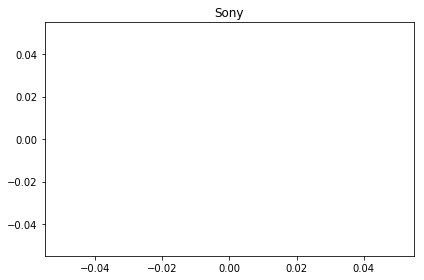

brand Western Digital
cat_list 644                     Backpacks
645          External Hard Drives
646               Hard Drive Bags
647          Internal Hard Drives
648              Network Antennas
649      Network Attached Storage
650    Powerline Network Adapters
651                       Routers
652       Streaming Media Players
653                      Switches
654            TV Remote Controls
Name: categories, dtype: object
count_list 644     147
645    5683
646     254
647    6708
648      49
649     421
650     200
651     278
652     829
653      58
654       5
Name: categories_count, dtype: int64


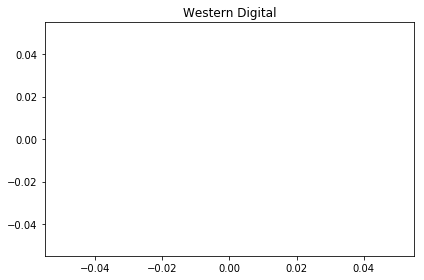

Br Logitech
brand Asus
cat_list 0                               AC Adapters
1                                      Amps
2                                 Batteries
3                            Blu-ray Drives
4                                   Bundles
5                    Cables & Interconnects
6                                     Cases
7                       Chargers & Adapters
8                   Computer Cable Adapters
9                       Computer Components
10                               DVD Drives
11                        Desktop Barebones
12                                 Desktops
13                         Docking Stations
14                      External Components
15                           Graphics Cards
16                              HDMI Cables
17            In-Dash DVD & Video Receivers
18                  Internal Blu-ray Drives
19                      Internal DVD Drives
20                     Internal Sound Cards
21                             KVM Switches


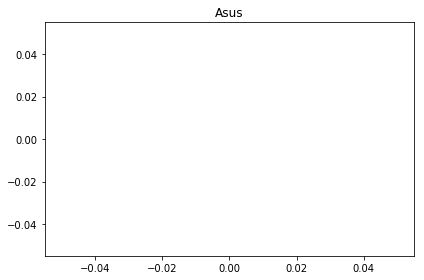

brand BELKIN
cat_list 45               Accessories & Supplies
46                             Adapters
47                             Antennas
48                             Armbands
49                         Audio Cables
50                            Batteries
51               Cable Security Devices
52                         Cable Straps
53                           Cable Ties
54               Cables & Interconnects
55                         Car Chargers
56                                Cases
57             Cassette Player Adapters
58                         Charger Kits
59                             Chargers
60                  Chargers & Adapters
61                      Composite Video
62              Computer Cable Adapters
63                  Computer Components
64                Connectors & Adapters
65                         Cooling Pads
66                           DVI Cables
67                    DVI-HDMI Adapters
68               Digital Coaxial Cables
69                

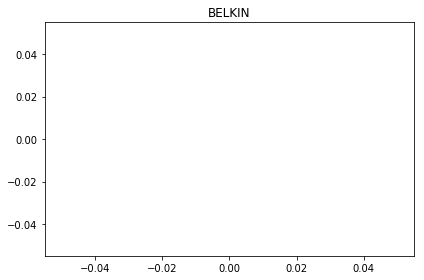

brand Canon
cat_list 131                          Accessory Kits
132                           Adapter Rings
133                                Adapters
134                   Adapters & Converters
135                               Backpacks
136                  Bag & Case Accessories
137                               Batteries
138                        Battery Chargers
139                           Battery Grips
140                   Binocular Accessories
141    Binocular, Camera & Camcorder Straps
142                              Binoculars
143                          Cables & Cords
144                               Camcorder
145                   Camcorder Accessories
146                     Camcorder Batteries
147                         Camcorder Cases
148                        Camcorder Lenses
149                              Camcorders
150                                  Camera
151                          Camera & Photo
152                        Camera Batteries
153        

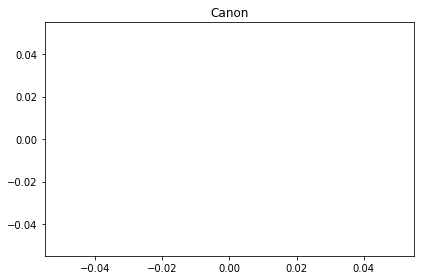

brand Generic
cat_list 194                         AC Adapters
195              Access-Control Keypads
196              Accessories & Supplies
197                      Accessory Kits
198                            Adapters
199           Audio & Video Accessories
200                          BD-R Discs
201              Bag & Case Accessories
202                           Batteries
203                       Battery Packs
204                             Bundles
205                          CD-R Discs
206                          Cable Ties
207                Cables & Accessories
208              Cables & Interconnects
209                           Camcorder
210                 Camcorder Batteries
211                              Camera
212                    Camera Batteries
213                        Camera Cases
214                        Car Chargers
215               Car Safety & Security
216                               Cases
217                     Cases & Sleeves
218            Ca

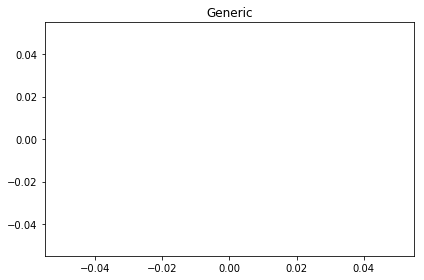

brand Logitech
cat_list 334                        AC Adapters
335          Audio & Video Accessories
336                          Batteries
337               Cables & Accessories
338                              Cases
339                Chargers & Adapters
340                Computer Components
341                  Computer Speakers
342              Connectors & Adapters
343                       Cooling Pads
344                   Docking Stations
345              Headphone Accessories
346                         Headphones
347             Headsets & Microphones
348                     Hidden Cameras
349                    Internet Radios
350            Keyboard & Mouse Combos
351                          Keyboards
352                              Lamps
353                               Mice
354                    Numeric Keypads
355                        PC Headsets
356                     PC Microphones
357                    Remote Controls
358           Remote-Control Extenders
3

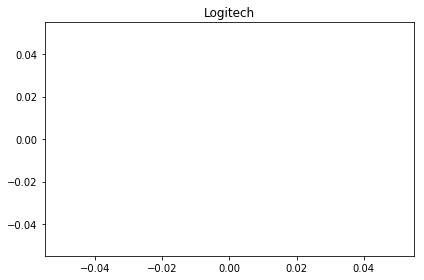

brand Nikon
cat_list 370                             Accessories
371                          Accessory Kits
372                                Adapters
373                  Bag & Case Accessories
374                           Battery Grips
375                   Binocular Accessories
376    Binocular, Camera & Camcorder Straps
377                              Binoculars
378                                  Camera
379                          Camera & Photo
380                        Camera Batteries
381                            Camera Cases
382                           Camera Lenses
383                                 Cameras
384                       Chargers & Cables
385                           Cleaning Kits
386                  Compact System Cameras
387                         Composite Video
388                 Computers & Accessories
389                   Digital Camera Lenses
390                         Digital Cameras
391              Digital SLR Camera Bundles
392        

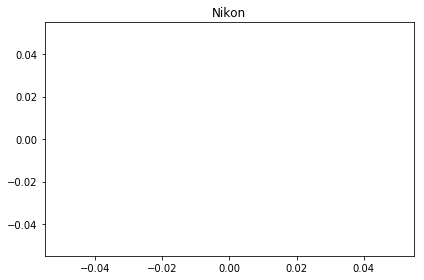

brand Samsung
cat_list 419                              3D Glasses
420                             AC Adapters
421                          Accessory Kits
422               Audio & Video Accessories
423                         Blu-ray Players
424                          Bullet Cameras
425                                 Bundles
426                    Cables & Accessories
427                  Cables & Interconnects
428                     Camcorder Batteries
429                              Camcorders
430                                  Camera
431                        Camera Batteries
432                           Camera Lenses
433                                   Cases
434                     Chargers & Adapters
435                  Compact System Cameras
436                 Computers & Accessories
437                              DVD Drives
438                             DVD Players
439                 DVD Players & Recorders
440                       DVI-HDMI Adapters
441      

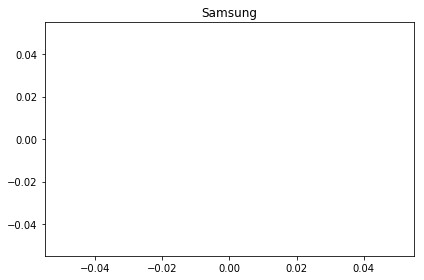

brand SanDisk
cat_list 487             CompactFlash Cards
488         Digital Picture Frames
489           External Hard Drives
490    Internal Solid State Drives
491                    MP3 Players
492           Memory Card Adapters
493            Memory Card Readers
494                   Memory Cards
495                  Memory Sticks
496                 Micro SD Cards
497                   MiniSD Cards
498                   Modem Cables
499                SD & SDHC Cards
500               SmartMedia Cards
501               USB Flash Drives
502               xD-Picture Cards
Name: categories, dtype: object
count_list 487    1036
488       6
489      92
490     303
491    2633
492     418
493     909
494      16
495     421
496    9528
497     137
498      10
499    6592
500       9
501    3430
502       5
Name: categories_count, dtype: int64


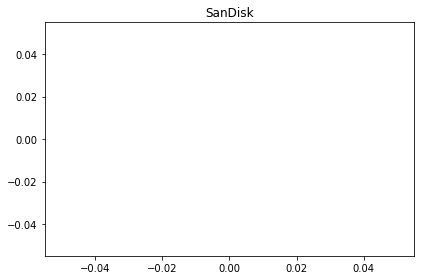

brand Sony
cat_list 503                              3D Glasses
504                             AC Adapters
505                          Accessory Kits
506                                Adapters
507                              Amplifiers
508               Audio & Video Accessories
509                              BD-R Discs
510                             BD-RE Discs
511                  Bag & Case Accessories
512                               Batteries
513                        Battery Chargers
514                           Battery Grips
515    Binocular, Camera & Camcorder Straps
516                         Blu-ray Players
517                      Bookshelf Speakers
518                               Boomboxes
519                              CD Players
520                              CD-R Discs
521                             CD-RW Discs
522                          Cables & Cords
523                  Cables & Interconnects
524                               Camcorder
525         

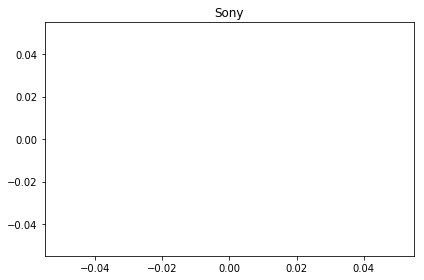

brand Western Digital
cat_list 644                     Backpacks
645          External Hard Drives
646               Hard Drive Bags
647          Internal Hard Drives
648              Network Antennas
649      Network Attached Storage
650    Powerline Network Adapters
651                       Routers
652       Streaming Media Players
653                      Switches
654            TV Remote Controls
Name: categories, dtype: object
count_list 644     147
645    5683
646     254
647    6708
648      49
649     421
650     200
651     278
652     829
653      58
654       5
Name: categories_count, dtype: int64


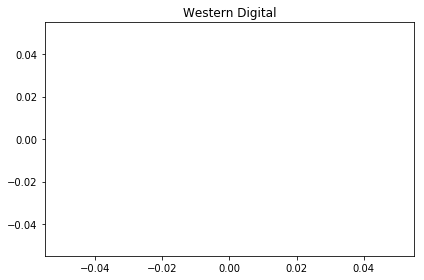

Br Nikon
brand Asus
cat_list 0                               AC Adapters
1                                      Amps
2                                 Batteries
3                            Blu-ray Drives
4                                   Bundles
5                    Cables & Interconnects
6                                     Cases
7                       Chargers & Adapters
8                   Computer Cable Adapters
9                       Computer Components
10                               DVD Drives
11                        Desktop Barebones
12                                 Desktops
13                         Docking Stations
14                      External Components
15                           Graphics Cards
16                              HDMI Cables
17            In-Dash DVD & Video Receivers
18                  Internal Blu-ray Drives
19                      Internal DVD Drives
20                     Internal Sound Cards
21                             KVM Switches
22 

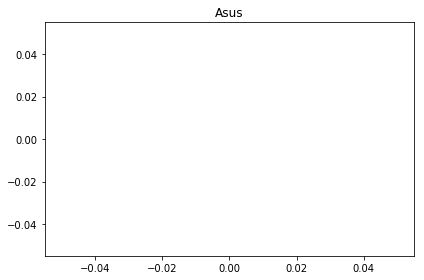

brand BELKIN
cat_list 45               Accessories & Supplies
46                             Adapters
47                             Antennas
48                             Armbands
49                         Audio Cables
50                            Batteries
51               Cable Security Devices
52                         Cable Straps
53                           Cable Ties
54               Cables & Interconnects
55                         Car Chargers
56                                Cases
57             Cassette Player Adapters
58                         Charger Kits
59                             Chargers
60                  Chargers & Adapters
61                      Composite Video
62              Computer Cable Adapters
63                  Computer Components
64                Connectors & Adapters
65                         Cooling Pads
66                           DVI Cables
67                    DVI-HDMI Adapters
68               Digital Coaxial Cables
69                

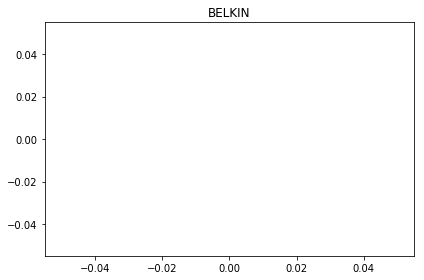

brand Canon
cat_list 131                          Accessory Kits
132                           Adapter Rings
133                                Adapters
134                   Adapters & Converters
135                               Backpacks
136                  Bag & Case Accessories
137                               Batteries
138                        Battery Chargers
139                           Battery Grips
140                   Binocular Accessories
141    Binocular, Camera & Camcorder Straps
142                              Binoculars
143                          Cables & Cords
144                               Camcorder
145                   Camcorder Accessories
146                     Camcorder Batteries
147                         Camcorder Cases
148                        Camcorder Lenses
149                              Camcorders
150                                  Camera
151                          Camera & Photo
152                        Camera Batteries
153        

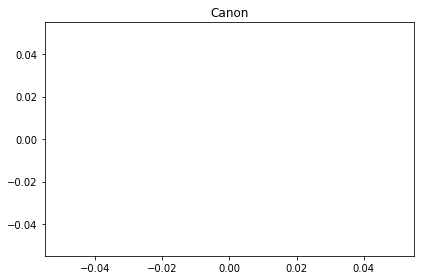

brand Generic
cat_list 194                         AC Adapters
195              Access-Control Keypads
196              Accessories & Supplies
197                      Accessory Kits
198                            Adapters
199           Audio & Video Accessories
200                          BD-R Discs
201              Bag & Case Accessories
202                           Batteries
203                       Battery Packs
204                             Bundles
205                          CD-R Discs
206                          Cable Ties
207                Cables & Accessories
208              Cables & Interconnects
209                           Camcorder
210                 Camcorder Batteries
211                              Camera
212                    Camera Batteries
213                        Camera Cases
214                        Car Chargers
215               Car Safety & Security
216                               Cases
217                     Cases & Sleeves
218            Ca

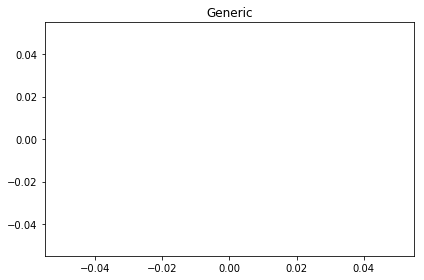

brand Logitech
cat_list 334                        AC Adapters
335          Audio & Video Accessories
336                          Batteries
337               Cables & Accessories
338                              Cases
339                Chargers & Adapters
340                Computer Components
341                  Computer Speakers
342              Connectors & Adapters
343                       Cooling Pads
344                   Docking Stations
345              Headphone Accessories
346                         Headphones
347             Headsets & Microphones
348                     Hidden Cameras
349                    Internet Radios
350            Keyboard & Mouse Combos
351                          Keyboards
352                              Lamps
353                               Mice
354                    Numeric Keypads
355                        PC Headsets
356                     PC Microphones
357                    Remote Controls
358           Remote-Control Extenders
3

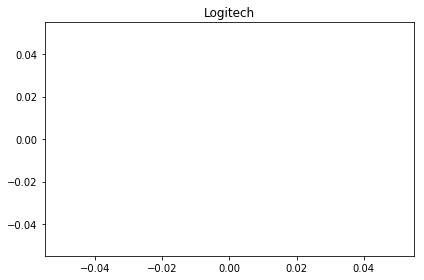

brand Nikon
cat_list 370                             Accessories
371                          Accessory Kits
372                                Adapters
373                  Bag & Case Accessories
374                           Battery Grips
375                   Binocular Accessories
376    Binocular, Camera & Camcorder Straps
377                              Binoculars
378                                  Camera
379                          Camera & Photo
380                        Camera Batteries
381                            Camera Cases
382                           Camera Lenses
383                                 Cameras
384                       Chargers & Cables
385                           Cleaning Kits
386                  Compact System Cameras
387                         Composite Video
388                 Computers & Accessories
389                   Digital Camera Lenses
390                         Digital Cameras
391              Digital SLR Camera Bundles
392        

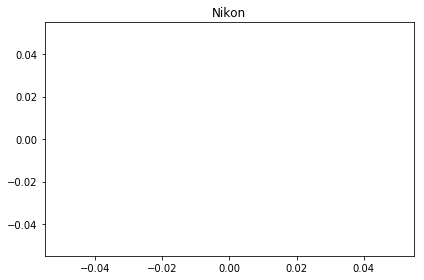

brand Samsung
cat_list 419                              3D Glasses
420                             AC Adapters
421                          Accessory Kits
422               Audio & Video Accessories
423                         Blu-ray Players
424                          Bullet Cameras
425                                 Bundles
426                    Cables & Accessories
427                  Cables & Interconnects
428                     Camcorder Batteries
429                              Camcorders
430                                  Camera
431                        Camera Batteries
432                           Camera Lenses
433                                   Cases
434                     Chargers & Adapters
435                  Compact System Cameras
436                 Computers & Accessories
437                              DVD Drives
438                             DVD Players
439                 DVD Players & Recorders
440                       DVI-HDMI Adapters
441      

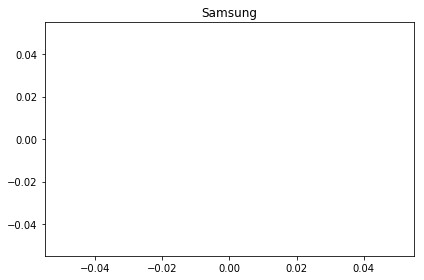

brand SanDisk
cat_list 487             CompactFlash Cards
488         Digital Picture Frames
489           External Hard Drives
490    Internal Solid State Drives
491                    MP3 Players
492           Memory Card Adapters
493            Memory Card Readers
494                   Memory Cards
495                  Memory Sticks
496                 Micro SD Cards
497                   MiniSD Cards
498                   Modem Cables
499                SD & SDHC Cards
500               SmartMedia Cards
501               USB Flash Drives
502               xD-Picture Cards
Name: categories, dtype: object
count_list 487    1036
488       6
489      92
490     303
491    2633
492     418
493     909
494      16
495     421
496    9528
497     137
498      10
499    6592
500       9
501    3430
502       5
Name: categories_count, dtype: int64


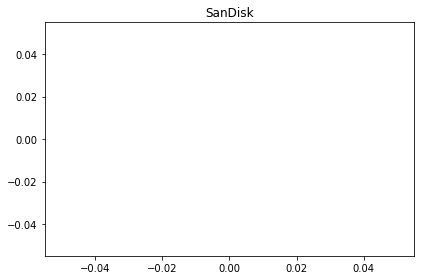

brand Sony
cat_list 503                              3D Glasses
504                             AC Adapters
505                          Accessory Kits
506                                Adapters
507                              Amplifiers
508               Audio & Video Accessories
509                              BD-R Discs
510                             BD-RE Discs
511                  Bag & Case Accessories
512                               Batteries
513                        Battery Chargers
514                           Battery Grips
515    Binocular, Camera & Camcorder Straps
516                         Blu-ray Players
517                      Bookshelf Speakers
518                               Boomboxes
519                              CD Players
520                              CD-R Discs
521                             CD-RW Discs
522                          Cables & Cords
523                  Cables & Interconnects
524                               Camcorder
525         

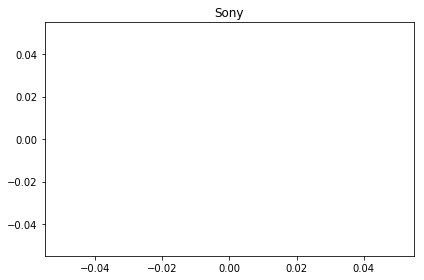

brand Western Digital
cat_list 644                     Backpacks
645          External Hard Drives
646               Hard Drive Bags
647          Internal Hard Drives
648              Network Antennas
649      Network Attached Storage
650    Powerline Network Adapters
651                       Routers
652       Streaming Media Players
653                      Switches
654            TV Remote Controls
Name: categories, dtype: object
count_list 644     147
645    5683
646     254
647    6708
648      49
649     421
650     200
651     278
652     829
653      58
654       5
Name: categories_count, dtype: int64


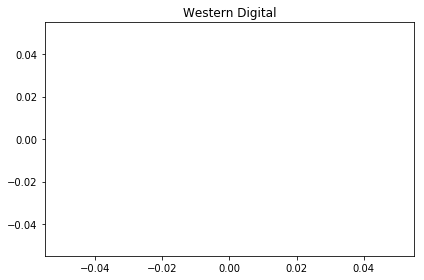

Br Samsung
brand Asus
cat_list 0                               AC Adapters
1                                      Amps
2                                 Batteries
3                            Blu-ray Drives
4                                   Bundles
5                    Cables & Interconnects
6                                     Cases
7                       Chargers & Adapters
8                   Computer Cable Adapters
9                       Computer Components
10                               DVD Drives
11                        Desktop Barebones
12                                 Desktops
13                         Docking Stations
14                      External Components
15                           Graphics Cards
16                              HDMI Cables
17            In-Dash DVD & Video Receivers
18                  Internal Blu-ray Drives
19                      Internal DVD Drives
20                     Internal Sound Cards
21                             KVM Switches
2

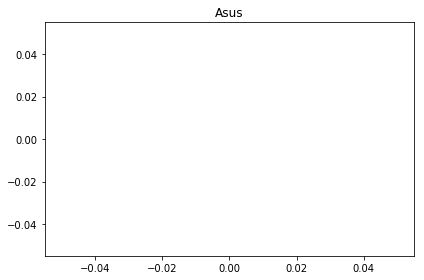

brand BELKIN
cat_list 45               Accessories & Supplies
46                             Adapters
47                             Antennas
48                             Armbands
49                         Audio Cables
50                            Batteries
51               Cable Security Devices
52                         Cable Straps
53                           Cable Ties
54               Cables & Interconnects
55                         Car Chargers
56                                Cases
57             Cassette Player Adapters
58                         Charger Kits
59                             Chargers
60                  Chargers & Adapters
61                      Composite Video
62              Computer Cable Adapters
63                  Computer Components
64                Connectors & Adapters
65                         Cooling Pads
66                           DVI Cables
67                    DVI-HDMI Adapters
68               Digital Coaxial Cables
69                

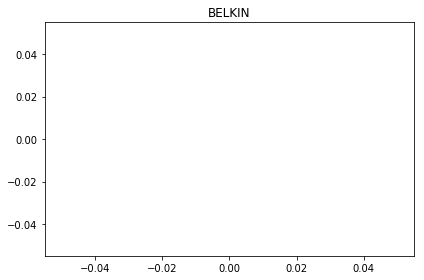

brand Canon
cat_list 131                          Accessory Kits
132                           Adapter Rings
133                                Adapters
134                   Adapters & Converters
135                               Backpacks
136                  Bag & Case Accessories
137                               Batteries
138                        Battery Chargers
139                           Battery Grips
140                   Binocular Accessories
141    Binocular, Camera & Camcorder Straps
142                              Binoculars
143                          Cables & Cords
144                               Camcorder
145                   Camcorder Accessories
146                     Camcorder Batteries
147                         Camcorder Cases
148                        Camcorder Lenses
149                              Camcorders
150                                  Camera
151                          Camera & Photo
152                        Camera Batteries
153        

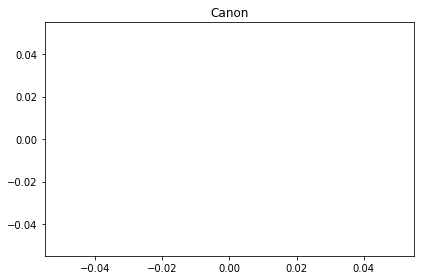

brand Generic
cat_list 194                         AC Adapters
195              Access-Control Keypads
196              Accessories & Supplies
197                      Accessory Kits
198                            Adapters
199           Audio & Video Accessories
200                          BD-R Discs
201              Bag & Case Accessories
202                           Batteries
203                       Battery Packs
204                             Bundles
205                          CD-R Discs
206                          Cable Ties
207                Cables & Accessories
208              Cables & Interconnects
209                           Camcorder
210                 Camcorder Batteries
211                              Camera
212                    Camera Batteries
213                        Camera Cases
214                        Car Chargers
215               Car Safety & Security
216                               Cases
217                     Cases & Sleeves
218            Ca

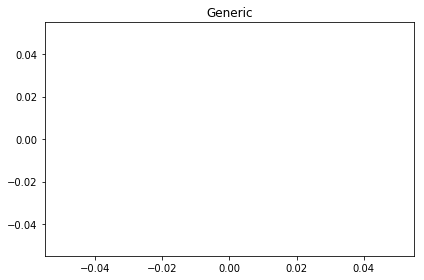

brand Logitech
cat_list 334                        AC Adapters
335          Audio & Video Accessories
336                          Batteries
337               Cables & Accessories
338                              Cases
339                Chargers & Adapters
340                Computer Components
341                  Computer Speakers
342              Connectors & Adapters
343                       Cooling Pads
344                   Docking Stations
345              Headphone Accessories
346                         Headphones
347             Headsets & Microphones
348                     Hidden Cameras
349                    Internet Radios
350            Keyboard & Mouse Combos
351                          Keyboards
352                              Lamps
353                               Mice
354                    Numeric Keypads
355                        PC Headsets
356                     PC Microphones
357                    Remote Controls
358           Remote-Control Extenders
3

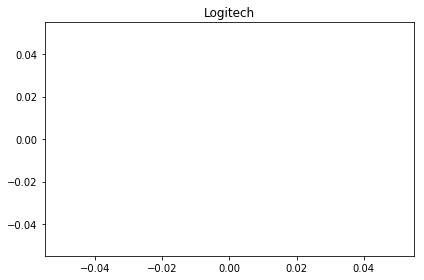

brand Nikon
cat_list 370                             Accessories
371                          Accessory Kits
372                                Adapters
373                  Bag & Case Accessories
374                           Battery Grips
375                   Binocular Accessories
376    Binocular, Camera & Camcorder Straps
377                              Binoculars
378                                  Camera
379                          Camera & Photo
380                        Camera Batteries
381                            Camera Cases
382                           Camera Lenses
383                                 Cameras
384                       Chargers & Cables
385                           Cleaning Kits
386                  Compact System Cameras
387                         Composite Video
388                 Computers & Accessories
389                   Digital Camera Lenses
390                         Digital Cameras
391              Digital SLR Camera Bundles
392        

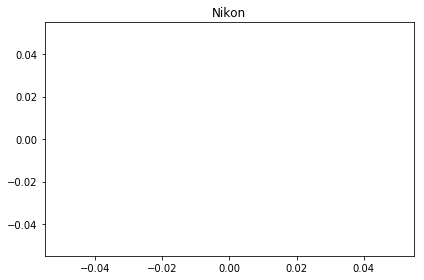

brand Samsung
cat_list 419                              3D Glasses
420                             AC Adapters
421                          Accessory Kits
422               Audio & Video Accessories
423                         Blu-ray Players
424                          Bullet Cameras
425                                 Bundles
426                    Cables & Accessories
427                  Cables & Interconnects
428                     Camcorder Batteries
429                              Camcorders
430                                  Camera
431                        Camera Batteries
432                           Camera Lenses
433                                   Cases
434                     Chargers & Adapters
435                  Compact System Cameras
436                 Computers & Accessories
437                              DVD Drives
438                             DVD Players
439                 DVD Players & Recorders
440                       DVI-HDMI Adapters
441      

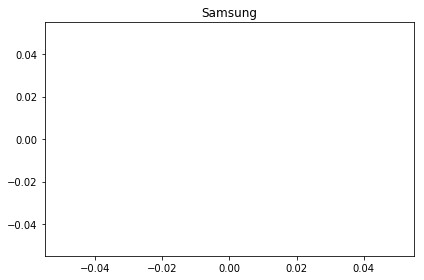

brand SanDisk
cat_list 487             CompactFlash Cards
488         Digital Picture Frames
489           External Hard Drives
490    Internal Solid State Drives
491                    MP3 Players
492           Memory Card Adapters
493            Memory Card Readers
494                   Memory Cards
495                  Memory Sticks
496                 Micro SD Cards
497                   MiniSD Cards
498                   Modem Cables
499                SD & SDHC Cards
500               SmartMedia Cards
501               USB Flash Drives
502               xD-Picture Cards
Name: categories, dtype: object
count_list 487    1036
488       6
489      92
490     303
491    2633
492     418
493     909
494      16
495     421
496    9528
497     137
498      10
499    6592
500       9
501    3430
502       5
Name: categories_count, dtype: int64


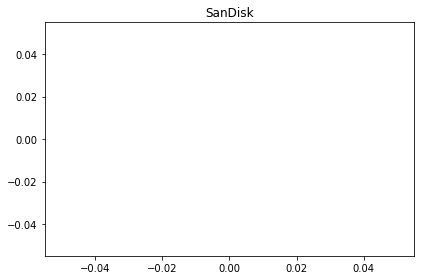

brand Sony
cat_list 503                              3D Glasses
504                             AC Adapters
505                          Accessory Kits
506                                Adapters
507                              Amplifiers
508               Audio & Video Accessories
509                              BD-R Discs
510                             BD-RE Discs
511                  Bag & Case Accessories
512                               Batteries
513                        Battery Chargers
514                           Battery Grips
515    Binocular, Camera & Camcorder Straps
516                         Blu-ray Players
517                      Bookshelf Speakers
518                               Boomboxes
519                              CD Players
520                              CD-R Discs
521                             CD-RW Discs
522                          Cables & Cords
523                  Cables & Interconnects
524                               Camcorder
525         

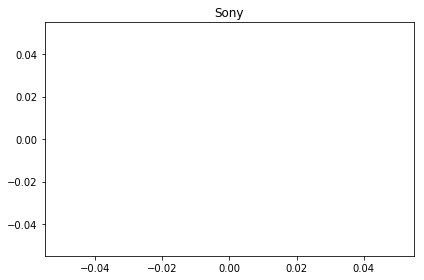

brand Western Digital
cat_list 644                     Backpacks
645          External Hard Drives
646               Hard Drive Bags
647          Internal Hard Drives
648              Network Antennas
649      Network Attached Storage
650    Powerline Network Adapters
651                       Routers
652       Streaming Media Players
653                      Switches
654            TV Remote Controls
Name: categories, dtype: object
count_list 644     147
645    5683
646     254
647    6708
648      49
649     421
650     200
651     278
652     829
653      58
654       5
Name: categories_count, dtype: int64


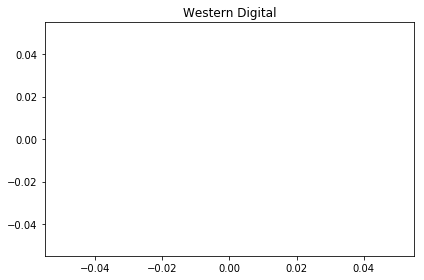

Br SanDisk
brand Asus
cat_list 0                               AC Adapters
1                                      Amps
2                                 Batteries
3                            Blu-ray Drives
4                                   Bundles
5                    Cables & Interconnects
6                                     Cases
7                       Chargers & Adapters
8                   Computer Cable Adapters
9                       Computer Components
10                               DVD Drives
11                        Desktop Barebones
12                                 Desktops
13                         Docking Stations
14                      External Components
15                           Graphics Cards
16                              HDMI Cables
17            In-Dash DVD & Video Receivers
18                  Internal Blu-ray Drives
19                      Internal DVD Drives
20                     Internal Sound Cards
21                             KVM Switches
2

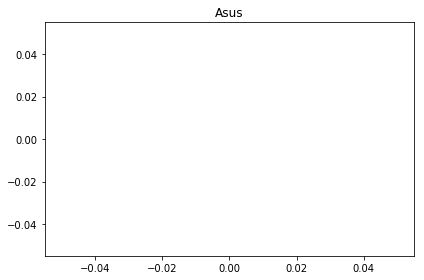

brand BELKIN
cat_list 45               Accessories & Supplies
46                             Adapters
47                             Antennas
48                             Armbands
49                         Audio Cables
50                            Batteries
51               Cable Security Devices
52                         Cable Straps
53                           Cable Ties
54               Cables & Interconnects
55                         Car Chargers
56                                Cases
57             Cassette Player Adapters
58                         Charger Kits
59                             Chargers
60                  Chargers & Adapters
61                      Composite Video
62              Computer Cable Adapters
63                  Computer Components
64                Connectors & Adapters
65                         Cooling Pads
66                           DVI Cables
67                    DVI-HDMI Adapters
68               Digital Coaxial Cables
69                

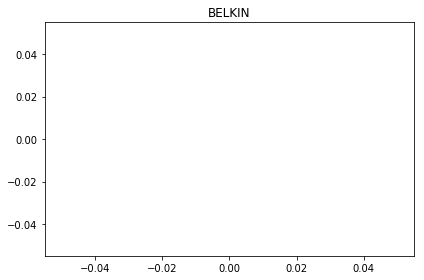

brand Canon
cat_list 131                          Accessory Kits
132                           Adapter Rings
133                                Adapters
134                   Adapters & Converters
135                               Backpacks
136                  Bag & Case Accessories
137                               Batteries
138                        Battery Chargers
139                           Battery Grips
140                   Binocular Accessories
141    Binocular, Camera & Camcorder Straps
142                              Binoculars
143                          Cables & Cords
144                               Camcorder
145                   Camcorder Accessories
146                     Camcorder Batteries
147                         Camcorder Cases
148                        Camcorder Lenses
149                              Camcorders
150                                  Camera
151                          Camera & Photo
152                        Camera Batteries
153        

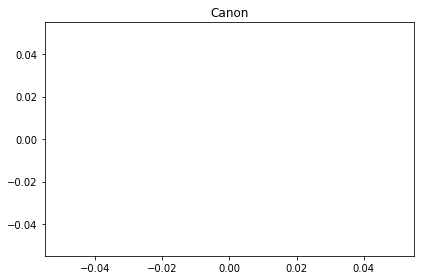

brand Generic
cat_list 194                         AC Adapters
195              Access-Control Keypads
196              Accessories & Supplies
197                      Accessory Kits
198                            Adapters
199           Audio & Video Accessories
200                          BD-R Discs
201              Bag & Case Accessories
202                           Batteries
203                       Battery Packs
204                             Bundles
205                          CD-R Discs
206                          Cable Ties
207                Cables & Accessories
208              Cables & Interconnects
209                           Camcorder
210                 Camcorder Batteries
211                              Camera
212                    Camera Batteries
213                        Camera Cases
214                        Car Chargers
215               Car Safety & Security
216                               Cases
217                     Cases & Sleeves
218            Ca

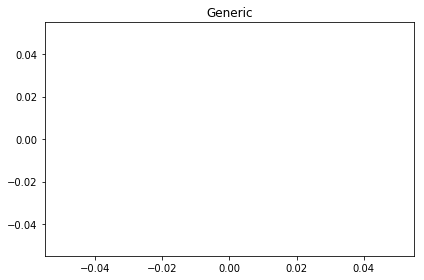

brand Logitech
cat_list 334                        AC Adapters
335          Audio & Video Accessories
336                          Batteries
337               Cables & Accessories
338                              Cases
339                Chargers & Adapters
340                Computer Components
341                  Computer Speakers
342              Connectors & Adapters
343                       Cooling Pads
344                   Docking Stations
345              Headphone Accessories
346                         Headphones
347             Headsets & Microphones
348                     Hidden Cameras
349                    Internet Radios
350            Keyboard & Mouse Combos
351                          Keyboards
352                              Lamps
353                               Mice
354                    Numeric Keypads
355                        PC Headsets
356                     PC Microphones
357                    Remote Controls
358           Remote-Control Extenders
3

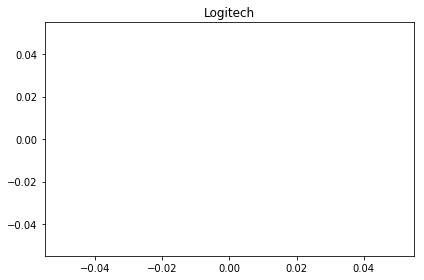

brand Nikon
cat_list 370                             Accessories
371                          Accessory Kits
372                                Adapters
373                  Bag & Case Accessories
374                           Battery Grips
375                   Binocular Accessories
376    Binocular, Camera & Camcorder Straps
377                              Binoculars
378                                  Camera
379                          Camera & Photo
380                        Camera Batteries
381                            Camera Cases
382                           Camera Lenses
383                                 Cameras
384                       Chargers & Cables
385                           Cleaning Kits
386                  Compact System Cameras
387                         Composite Video
388                 Computers & Accessories
389                   Digital Camera Lenses
390                         Digital Cameras
391              Digital SLR Camera Bundles
392        

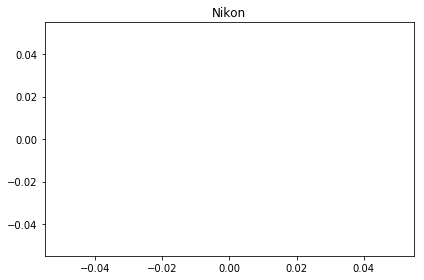

brand Samsung
cat_list 419                              3D Glasses
420                             AC Adapters
421                          Accessory Kits
422               Audio & Video Accessories
423                         Blu-ray Players
424                          Bullet Cameras
425                                 Bundles
426                    Cables & Accessories
427                  Cables & Interconnects
428                     Camcorder Batteries
429                              Camcorders
430                                  Camera
431                        Camera Batteries
432                           Camera Lenses
433                                   Cases
434                     Chargers & Adapters
435                  Compact System Cameras
436                 Computers & Accessories
437                              DVD Drives
438                             DVD Players
439                 DVD Players & Recorders
440                       DVI-HDMI Adapters
441      

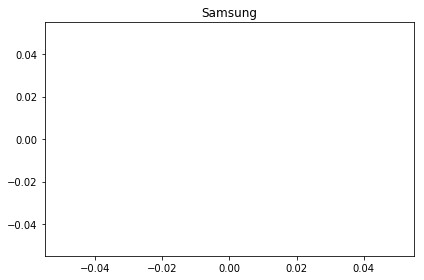

brand SanDisk
cat_list 487             CompactFlash Cards
488         Digital Picture Frames
489           External Hard Drives
490    Internal Solid State Drives
491                    MP3 Players
492           Memory Card Adapters
493            Memory Card Readers
494                   Memory Cards
495                  Memory Sticks
496                 Micro SD Cards
497                   MiniSD Cards
498                   Modem Cables
499                SD & SDHC Cards
500               SmartMedia Cards
501               USB Flash Drives
502               xD-Picture Cards
Name: categories, dtype: object
count_list 487    1036
488       6
489      92
490     303
491    2633
492     418
493     909
494      16
495     421
496    9528
497     137
498      10
499    6592
500       9
501    3430
502       5
Name: categories_count, dtype: int64


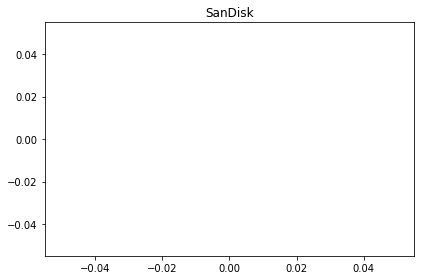

brand Sony
cat_list 503                              3D Glasses
504                             AC Adapters
505                          Accessory Kits
506                                Adapters
507                              Amplifiers
508               Audio & Video Accessories
509                              BD-R Discs
510                             BD-RE Discs
511                  Bag & Case Accessories
512                               Batteries
513                        Battery Chargers
514                           Battery Grips
515    Binocular, Camera & Camcorder Straps
516                         Blu-ray Players
517                      Bookshelf Speakers
518                               Boomboxes
519                              CD Players
520                              CD-R Discs
521                             CD-RW Discs
522                          Cables & Cords
523                  Cables & Interconnects
524                               Camcorder
525         

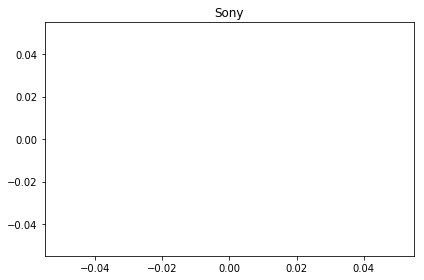

brand Western Digital
cat_list 644                     Backpacks
645          External Hard Drives
646               Hard Drive Bags
647          Internal Hard Drives
648              Network Antennas
649      Network Attached Storage
650    Powerline Network Adapters
651                       Routers
652       Streaming Media Players
653                      Switches
654            TV Remote Controls
Name: categories, dtype: object
count_list 644     147
645    5683
646     254
647    6708
648      49
649     421
650     200
651     278
652     829
653      58
654       5
Name: categories_count, dtype: int64


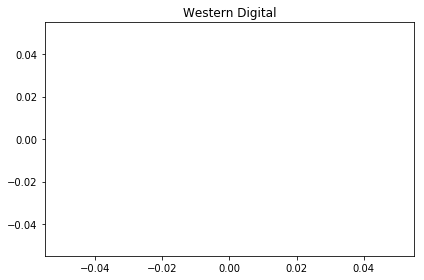

Br Sony
brand Asus
cat_list 0                               AC Adapters
1                                      Amps
2                                 Batteries
3                            Blu-ray Drives
4                                   Bundles
5                    Cables & Interconnects
6                                     Cases
7                       Chargers & Adapters
8                   Computer Cable Adapters
9                       Computer Components
10                               DVD Drives
11                        Desktop Barebones
12                                 Desktops
13                         Docking Stations
14                      External Components
15                           Graphics Cards
16                              HDMI Cables
17            In-Dash DVD & Video Receivers
18                  Internal Blu-ray Drives
19                      Internal DVD Drives
20                     Internal Sound Cards
21                             KVM Switches
22  

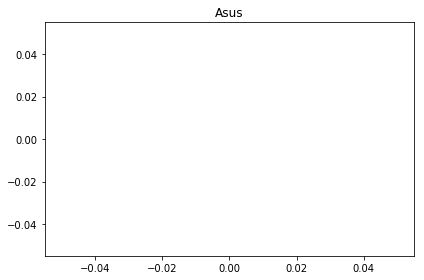

brand BELKIN
cat_list 45               Accessories & Supplies
46                             Adapters
47                             Antennas
48                             Armbands
49                         Audio Cables
50                            Batteries
51               Cable Security Devices
52                         Cable Straps
53                           Cable Ties
54               Cables & Interconnects
55                         Car Chargers
56                                Cases
57             Cassette Player Adapters
58                         Charger Kits
59                             Chargers
60                  Chargers & Adapters
61                      Composite Video
62              Computer Cable Adapters
63                  Computer Components
64                Connectors & Adapters
65                         Cooling Pads
66                           DVI Cables
67                    DVI-HDMI Adapters
68               Digital Coaxial Cables
69                

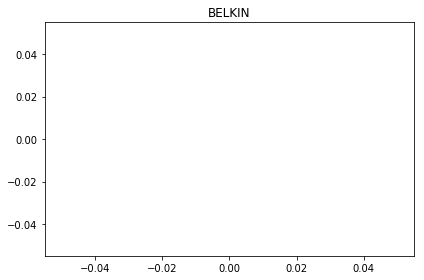

brand Canon
cat_list 131                          Accessory Kits
132                           Adapter Rings
133                                Adapters
134                   Adapters & Converters
135                               Backpacks
136                  Bag & Case Accessories
137                               Batteries
138                        Battery Chargers
139                           Battery Grips
140                   Binocular Accessories
141    Binocular, Camera & Camcorder Straps
142                              Binoculars
143                          Cables & Cords
144                               Camcorder
145                   Camcorder Accessories
146                     Camcorder Batteries
147                         Camcorder Cases
148                        Camcorder Lenses
149                              Camcorders
150                                  Camera
151                          Camera & Photo
152                        Camera Batteries
153        

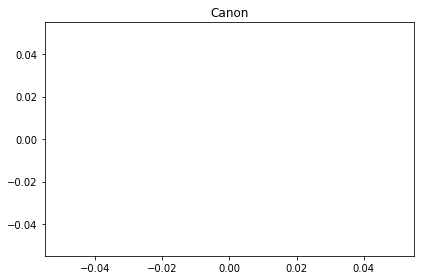

brand Generic
cat_list 194                         AC Adapters
195              Access-Control Keypads
196              Accessories & Supplies
197                      Accessory Kits
198                            Adapters
199           Audio & Video Accessories
200                          BD-R Discs
201              Bag & Case Accessories
202                           Batteries
203                       Battery Packs
204                             Bundles
205                          CD-R Discs
206                          Cable Ties
207                Cables & Accessories
208              Cables & Interconnects
209                           Camcorder
210                 Camcorder Batteries
211                              Camera
212                    Camera Batteries
213                        Camera Cases
214                        Car Chargers
215               Car Safety & Security
216                               Cases
217                     Cases & Sleeves
218            Ca

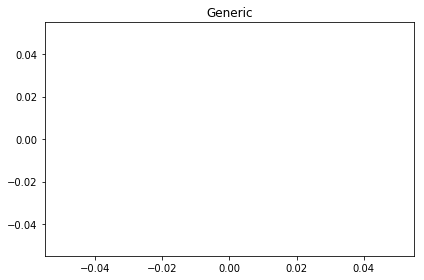

brand Logitech
cat_list 334                        AC Adapters
335          Audio & Video Accessories
336                          Batteries
337               Cables & Accessories
338                              Cases
339                Chargers & Adapters
340                Computer Components
341                  Computer Speakers
342              Connectors & Adapters
343                       Cooling Pads
344                   Docking Stations
345              Headphone Accessories
346                         Headphones
347             Headsets & Microphones
348                     Hidden Cameras
349                    Internet Radios
350            Keyboard & Mouse Combos
351                          Keyboards
352                              Lamps
353                               Mice
354                    Numeric Keypads
355                        PC Headsets
356                     PC Microphones
357                    Remote Controls
358           Remote-Control Extenders
3

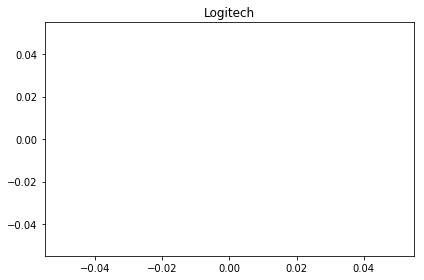

brand Nikon
cat_list 370                             Accessories
371                          Accessory Kits
372                                Adapters
373                  Bag & Case Accessories
374                           Battery Grips
375                   Binocular Accessories
376    Binocular, Camera & Camcorder Straps
377                              Binoculars
378                                  Camera
379                          Camera & Photo
380                        Camera Batteries
381                            Camera Cases
382                           Camera Lenses
383                                 Cameras
384                       Chargers & Cables
385                           Cleaning Kits
386                  Compact System Cameras
387                         Composite Video
388                 Computers & Accessories
389                   Digital Camera Lenses
390                         Digital Cameras
391              Digital SLR Camera Bundles
392        

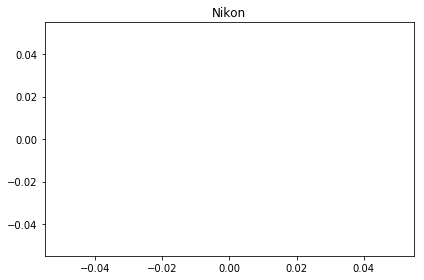

brand Samsung
cat_list 419                              3D Glasses
420                             AC Adapters
421                          Accessory Kits
422               Audio & Video Accessories
423                         Blu-ray Players
424                          Bullet Cameras
425                                 Bundles
426                    Cables & Accessories
427                  Cables & Interconnects
428                     Camcorder Batteries
429                              Camcorders
430                                  Camera
431                        Camera Batteries
432                           Camera Lenses
433                                   Cases
434                     Chargers & Adapters
435                  Compact System Cameras
436                 Computers & Accessories
437                              DVD Drives
438                             DVD Players
439                 DVD Players & Recorders
440                       DVI-HDMI Adapters
441      

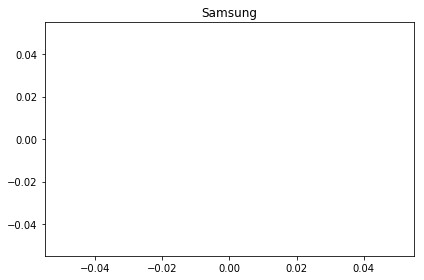

brand SanDisk
cat_list 487             CompactFlash Cards
488         Digital Picture Frames
489           External Hard Drives
490    Internal Solid State Drives
491                    MP3 Players
492           Memory Card Adapters
493            Memory Card Readers
494                   Memory Cards
495                  Memory Sticks
496                 Micro SD Cards
497                   MiniSD Cards
498                   Modem Cables
499                SD & SDHC Cards
500               SmartMedia Cards
501               USB Flash Drives
502               xD-Picture Cards
Name: categories, dtype: object
count_list 487    1036
488       6
489      92
490     303
491    2633
492     418
493     909
494      16
495     421
496    9528
497     137
498      10
499    6592
500       9
501    3430
502       5
Name: categories_count, dtype: int64


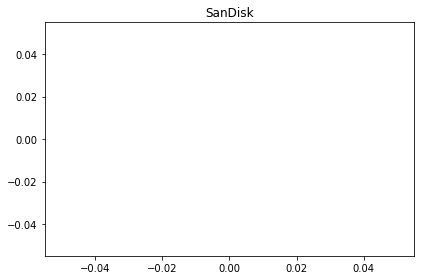

brand Sony
cat_list 503                              3D Glasses
504                             AC Adapters
505                          Accessory Kits
506                                Adapters
507                              Amplifiers
508               Audio & Video Accessories
509                              BD-R Discs
510                             BD-RE Discs
511                  Bag & Case Accessories
512                               Batteries
513                        Battery Chargers
514                           Battery Grips
515    Binocular, Camera & Camcorder Straps
516                         Blu-ray Players
517                      Bookshelf Speakers
518                               Boomboxes
519                              CD Players
520                              CD-R Discs
521                             CD-RW Discs
522                          Cables & Cords
523                  Cables & Interconnects
524                               Camcorder
525         

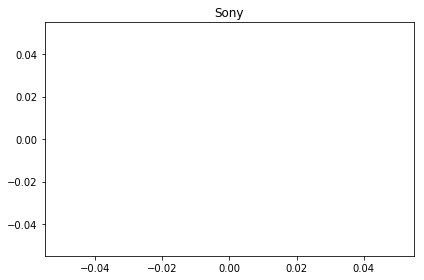

brand Western Digital
cat_list 644                     Backpacks
645          External Hard Drives
646               Hard Drive Bags
647          Internal Hard Drives
648              Network Antennas
649      Network Attached Storage
650    Powerline Network Adapters
651                       Routers
652       Streaming Media Players
653                      Switches
654            TV Remote Controls
Name: categories, dtype: object
count_list 644     147
645    5683
646     254
647    6708
648      49
649     421
650     200
651     278
652     829
653      58
654       5
Name: categories_count, dtype: int64


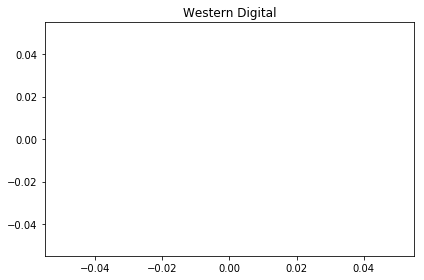

Br Western Digital
brand Asus
cat_list 0                               AC Adapters
1                                      Amps
2                                 Batteries
3                            Blu-ray Drives
4                                   Bundles
5                    Cables & Interconnects
6                                     Cases
7                       Chargers & Adapters
8                   Computer Cable Adapters
9                       Computer Components
10                               DVD Drives
11                        Desktop Barebones
12                                 Desktops
13                         Docking Stations
14                      External Components
15                           Graphics Cards
16                              HDMI Cables
17            In-Dash DVD & Video Receivers
18                  Internal Blu-ray Drives
19                      Internal DVD Drives
20                     Internal Sound Cards
21                             KVM Sw

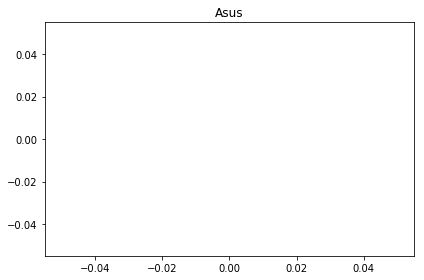

brand BELKIN
cat_list 45               Accessories & Supplies
46                             Adapters
47                             Antennas
48                             Armbands
49                         Audio Cables
50                            Batteries
51               Cable Security Devices
52                         Cable Straps
53                           Cable Ties
54               Cables & Interconnects
55                         Car Chargers
56                                Cases
57             Cassette Player Adapters
58                         Charger Kits
59                             Chargers
60                  Chargers & Adapters
61                      Composite Video
62              Computer Cable Adapters
63                  Computer Components
64                Connectors & Adapters
65                         Cooling Pads
66                           DVI Cables
67                    DVI-HDMI Adapters
68               Digital Coaxial Cables
69                

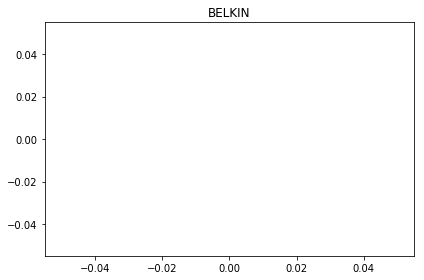

brand Canon
cat_list 131                          Accessory Kits
132                           Adapter Rings
133                                Adapters
134                   Adapters & Converters
135                               Backpacks
136                  Bag & Case Accessories
137                               Batteries
138                        Battery Chargers
139                           Battery Grips
140                   Binocular Accessories
141    Binocular, Camera & Camcorder Straps
142                              Binoculars
143                          Cables & Cords
144                               Camcorder
145                   Camcorder Accessories
146                     Camcorder Batteries
147                         Camcorder Cases
148                        Camcorder Lenses
149                              Camcorders
150                                  Camera
151                          Camera & Photo
152                        Camera Batteries
153        

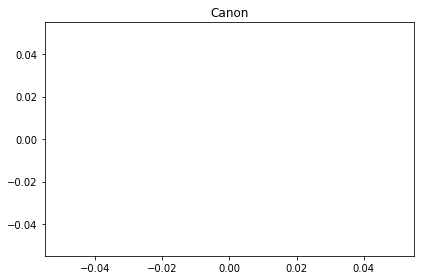

brand Generic
cat_list 194                         AC Adapters
195              Access-Control Keypads
196              Accessories & Supplies
197                      Accessory Kits
198                            Adapters
199           Audio & Video Accessories
200                          BD-R Discs
201              Bag & Case Accessories
202                           Batteries
203                       Battery Packs
204                             Bundles
205                          CD-R Discs
206                          Cable Ties
207                Cables & Accessories
208              Cables & Interconnects
209                           Camcorder
210                 Camcorder Batteries
211                              Camera
212                    Camera Batteries
213                        Camera Cases
214                        Car Chargers
215               Car Safety & Security
216                               Cases
217                     Cases & Sleeves
218            Ca

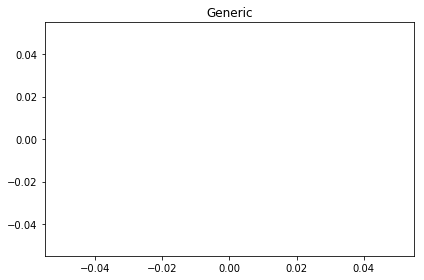

brand Logitech
cat_list 334                        AC Adapters
335          Audio & Video Accessories
336                          Batteries
337               Cables & Accessories
338                              Cases
339                Chargers & Adapters
340                Computer Components
341                  Computer Speakers
342              Connectors & Adapters
343                       Cooling Pads
344                   Docking Stations
345              Headphone Accessories
346                         Headphones
347             Headsets & Microphones
348                     Hidden Cameras
349                    Internet Radios
350            Keyboard & Mouse Combos
351                          Keyboards
352                              Lamps
353                               Mice
354                    Numeric Keypads
355                        PC Headsets
356                     PC Microphones
357                    Remote Controls
358           Remote-Control Extenders
3

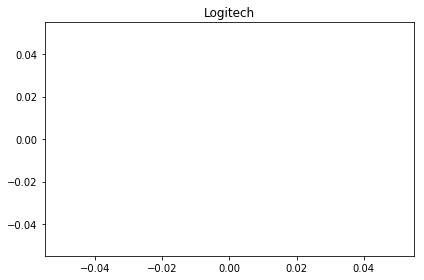

brand Nikon
cat_list 370                             Accessories
371                          Accessory Kits
372                                Adapters
373                  Bag & Case Accessories
374                           Battery Grips
375                   Binocular Accessories
376    Binocular, Camera & Camcorder Straps
377                              Binoculars
378                                  Camera
379                          Camera & Photo
380                        Camera Batteries
381                            Camera Cases
382                           Camera Lenses
383                                 Cameras
384                       Chargers & Cables
385                           Cleaning Kits
386                  Compact System Cameras
387                         Composite Video
388                 Computers & Accessories
389                   Digital Camera Lenses
390                         Digital Cameras
391              Digital SLR Camera Bundles
392        

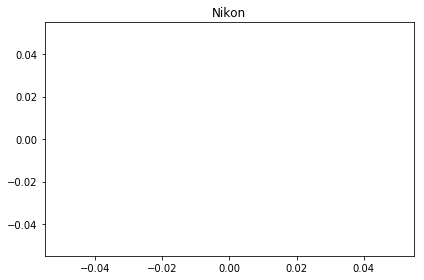

brand Samsung
cat_list 419                              3D Glasses
420                             AC Adapters
421                          Accessory Kits
422               Audio & Video Accessories
423                         Blu-ray Players
424                          Bullet Cameras
425                                 Bundles
426                    Cables & Accessories
427                  Cables & Interconnects
428                     Camcorder Batteries
429                              Camcorders
430                                  Camera
431                        Camera Batteries
432                           Camera Lenses
433                                   Cases
434                     Chargers & Adapters
435                  Compact System Cameras
436                 Computers & Accessories
437                              DVD Drives
438                             DVD Players
439                 DVD Players & Recorders
440                       DVI-HDMI Adapters
441      

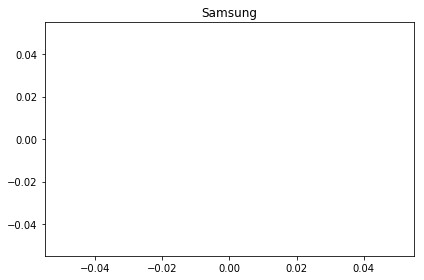

brand SanDisk
cat_list 487             CompactFlash Cards
488         Digital Picture Frames
489           External Hard Drives
490    Internal Solid State Drives
491                    MP3 Players
492           Memory Card Adapters
493            Memory Card Readers
494                   Memory Cards
495                  Memory Sticks
496                 Micro SD Cards
497                   MiniSD Cards
498                   Modem Cables
499                SD & SDHC Cards
500               SmartMedia Cards
501               USB Flash Drives
502               xD-Picture Cards
Name: categories, dtype: object
count_list 487    1036
488       6
489      92
490     303
491    2633
492     418
493     909
494      16
495     421
496    9528
497     137
498      10
499    6592
500       9
501    3430
502       5
Name: categories_count, dtype: int64


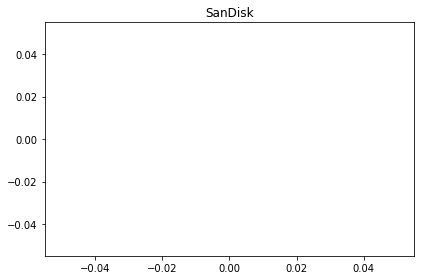

brand Sony
cat_list 503                              3D Glasses
504                             AC Adapters
505                          Accessory Kits
506                                Adapters
507                              Amplifiers
508               Audio & Video Accessories
509                              BD-R Discs
510                             BD-RE Discs
511                  Bag & Case Accessories
512                               Batteries
513                        Battery Chargers
514                           Battery Grips
515    Binocular, Camera & Camcorder Straps
516                         Blu-ray Players
517                      Bookshelf Speakers
518                               Boomboxes
519                              CD Players
520                              CD-R Discs
521                             CD-RW Discs
522                          Cables & Cords
523                  Cables & Interconnects
524                               Camcorder
525         

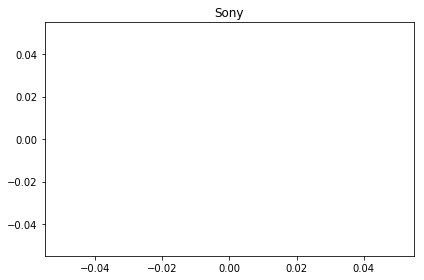

brand Western Digital
cat_list 644                     Backpacks
645          External Hard Drives
646               Hard Drive Bags
647          Internal Hard Drives
648              Network Antennas
649      Network Attached Storage
650    Powerline Network Adapters
651                       Routers
652       Streaming Media Players
653                      Switches
654            TV Remote Controls
Name: categories, dtype: object
count_list 644     147
645    5683
646     254
647    6708
648      49
649     421
650     200
651     278
652     829
653      58
654       5
Name: categories_count, dtype: int64


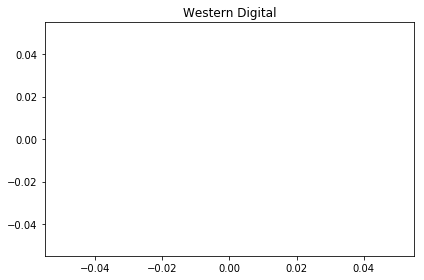

In [177]:
for (idx,br) in enumerate(top_brand_categories_gb_brand):
    print("Br",br[0])
    for (cat,count) in zip(top_brand_categories_gb_brand.categories,top_brand_categories_gb_brand.categories_count):
        cat_list = list(cat)
#         print("cat_list[1]",cat_list[1])
#         print("cat_list[0]",cat_list[0]) # brand name
        count_list = list(count)
#         print("count_list[1]",count_list[1])
        plot_graph_new(cat_list[0],cat_list[1],count_list[1])